# Plots for section 4 systems

## Imports

In [11]:
import pandas as pd
import geopandas as gpd
import numpy as np
import pypsa
import datetime
import seaborn as sns
import cartopy
import cartopy.crs as ccrs
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# imported own functions
from utils import market_values, market_values_by_time_index, nodal_balance, capacity, capacity_links, capacity_storage_units, get_condense_sum, nodal_balance

# imported own definitions
from utils import carrier_colors, carrier_renaming, resistive_heater, gas_boiler, heat_pump, water_tanks_charger, water_tanks_discharger, solar_thermal

# general variables
font1 = {'fontname':'Calibri'}
PLOT_DIR = 'C:/Users/Julian/Studies/Master/01 TU Berlin/3. Semester - Masterarbeit/MA Marktwerte FEE/data/plots/'
onshore_regions = gpd.read_file("../data/external/regions_onshore_elec_s_181.geojson")
offshore_regions = gpd.read_file("../data/external/regions_offshore_elec_s_181.geojson")
onshore_regions = onshore_regions.set_index('name')
offshore_regions = offshore_regions.set_index('name')

In [2]:
# Network imports
n_no =pypsa.Network("../data/raw/elec_s_181_lv1.0__Co2L0-3H-T-H-B-I-A-solar+p3-linemaxext10-noH2network_2030.nc")
n_h2 =pypsa.Network("../data/raw/elec_s_181_lvopt__Co2L0-3H-T-H-B-I-A-solar+p3-linemaxext10_2030.nc")

Importing PyPSA from older version of PyPSA than current version.
Please read the release notes at https://pypsa.readthedocs.io/en/latest/release_notes.html
carefully to prepare your network for import.
Currently used PyPSA version [0, 20, 1], imported network file PyPSA version [0, 18, 1].

INFO:pypsa.io:Imported network elec_s_181_lv1.0__Co2L0-3H-T-H-B-I-A-solar+p3-linemaxext10-noH2network_2030.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
Importing PyPSA from older version of PyPSA than current version.
Please read the release notes at https://pypsa.readthedocs.io/en/latest/release_notes.html
carefully to prepare your network for import.
Currently used PyPSA version [0, 20, 1], imported network file PyPSA version [0, 18, 1].

INFO:pypsa.io:Imported network elec_s_181_lvopt__Co2L0-3H-T-H-B-I-A-solar+p3-linemaxext10_2030.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [3]:
# Notebook Definitions
c1_groups = [resistive_heater, gas_boiler, heat_pump, water_tanks_charger, water_tanks_discharger, solar_thermal]
c1_groups_name = ["resistive heater", "gas boiler", "heat pump", "water tanks charger", "water tanks discharger", "solar thermal"]

In [4]:
# Notebook Functions

def get_df(df_no, df_h2, carriers):
    result = pd.DataFrame(index = ["no H2 network", "H2 network"])

    for c in carriers:
        result.loc["no H2 network" , c] = df_no[c].values
        result.loc["H2 network" , c] = df_h2[c].values
    return result

In [5]:
# Regions

onshore_regions['coords'] = onshore_regions['geometry'].apply(lambda x: x.representative_point().coords[:])
onshore_regions['coords'] = [coords[0] for coords in onshore_regions['coords']]
onshore_regions["name"] = onshore_regions.index
offshore_regions['coords'] = offshore_regions['geometry'].apply(lambda x: x.representative_point().coords[:])
offshore_regions['coords'] = [coords[0] for coords in offshore_regions['coords']]
offshore_regions["name"] = offshore_regions.index

# 4.1 Overview

## Network Overview

### Electricity grid

In [9]:
m_no = n_no.copy()
m_no.mremove("Bus",m_no.buses[m_no.buses.x == 0].index )

m_h2 = n_h2.copy()
m_h2.mremove("Bus",m_h2.buses[m_h2.buses.x == 0].index )

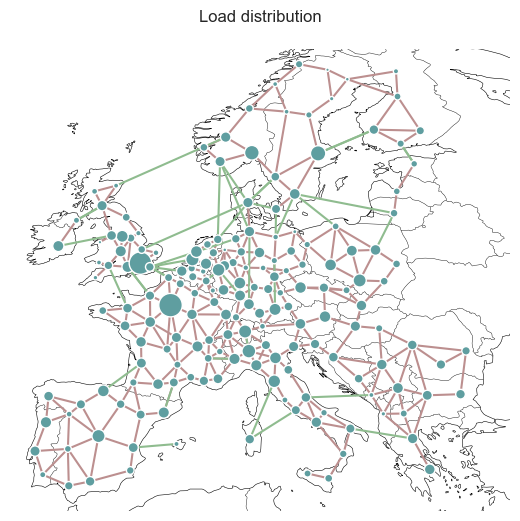

In [10]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.EqualEarth()}, figsize=(8, 6))

bus_locs = pd.Index(m_no.buses.location.unique())
load_distribution = m_no.loads_t.p[bus_locs].sum()/m_no.loads_t.p[bus_locs].sum().max()

m_no.plot(bus_sizes=1*load_distribution, ax=ax, projection=ccrs.EqualEarth())
ax.set_title("Load distribution", pad=20)
plt.show()

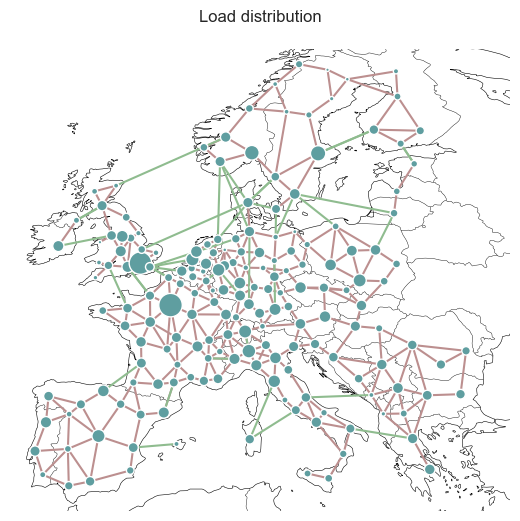

In [11]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.EqualEarth()}, figsize=(8, 6))

bus_locs = pd.Index(m_h2.buses.location.unique())
load_distribution = m_h2.loads_t.p[bus_locs].sum()/m_h2.loads_t.p[bus_locs].sum().max()

m_h2.plot(bus_sizes=1*load_distribution, ax=ax, projection=ccrs.EqualEarth())
ax.set_title("Load distribution", pad=20)
plt.show()

In [12]:
# electricity network

In [13]:
# all AC network lines are froms ame type
n_no.lines.type.unique()

array(['Al/St 240/40 4-bundle 380.0'], dtype=object)

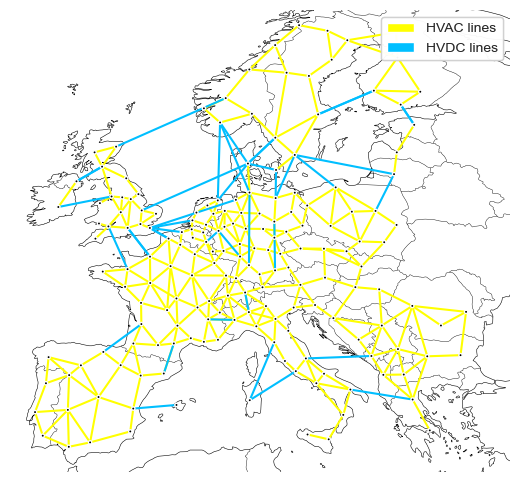

In [14]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.EqualEarth()}, figsize=(8, 6))

m_no.plot(ax=ax, projection=ccrs.EqualEarth(), bus_colors="black", line_colors="yellow", link_colors="deepskyblue")
pypsa.plot.add_legend_patches(ax=ax, labels=["HVAC lines", "HVDC lines"], colors=["yellow","deepskyblue"])
plt.show()

In [15]:
m_h2.links[m_h2.links.length != 0]

bus0      bus1      carrier  \
Link                                                          
14547                         IT0 10     GR0 1           DC   
5686                           ES2 0     ES0 8           DC   
14539                          ME0 0    IT0 14           DC   
12998                          IT0 4     IT1 0           DC   
14562                         FR0 26     ES0 7           DC   
...                              ...       ...          ...   
H2 pipeline SE3 1 -> SE3 7  SE3 1 H2  SE3 7 H2  H2 pipeline   
H2 pipeline SE3 2 -> SE3 5  SE3 2 H2  SE3 5 H2  H2 pipeline   
H2 pipeline SE3 3 -> SE3 6  SE3 3 H2  SE3 6 H2  H2 pipeline   
H2 pipeline SE3 4 -> SE3 7  SE3 4 H2  SE3 7 H2  H2 pipeline   
H2 pipeline SE3 5 -> SE3 6  SE3 5 H2  SE3 6 H2  H2 pipeline   

                                                                     geometry  \
Link                                                                            
14547                       LINESTRING(21.0892517161789 39.3174860744064,2...   
5686                        LINESTRING(2.48932993486183 39.561252379133,1....   
14539                       LINESTRING(14.0986517070226 42.4133438660838,1...   
12998                       LINESTRING(9.17009350125146 41.2967653544603,9...   
14562                       LINESTRING(2.98259070757654 42.2776059846425,2...   
...                                                                       ...   
H2 pipeline SE3 1 -> SE3 7                                                      
H2 pipeline SE3 2 -> SE3 5                                                      
H2 pipeline SE3 3 -> SE3 6                                                      
H2 pipeline SE3 4 -> SE3 7                                                      
H2 pipeline SE3 5 -> SE3 6                                                      

                                length   p_nom  \
Link                                             
14547                       540.473320   500.0   
5686                        380.149764   400.0   
14539                       560.240709     0.0   
12998                       484.073068  1000.0   
14562                       281.052745  2000.0   
...                                ...     ...   
H2 pipeline SE3 1 -> SE3 7  272.988128     0.0   
H2 pipeline SE3 2 -> SE3 5  141.983342     0.0   
H2 pipeline SE3 3 -> SE3 6  222.522966     0.0   
H2 pipeline SE3 4 -> SE3 7  161.813506     0.0   
H2 pipeline SE3 5 -> SE3 6  751.431228     0.0   

                                                                         tags  \
Link                                                                            
14547                                                                           
5686                        "MW"=>"None", "TSO"=>"None", "oid"=>"32590", "...   
14539                                                                           
12998                                                                           
14562                                                                           
...                                                                       ...   
H2 pipeline SE3 1 -> SE3 7                                                      
H2 pipeline SE3 2 -> SE3 5                                                      
H2 pipeline SE3 3 -> SE3 6                                                      
H2 pipeline SE3 4 -> SE3 7                                                      
H2 pipeline SE3 5 -> SE3 6                                                      

                            under_construction  underground  p_min_pu  ...  \
Link                                                                   ...   
14547                                      0.0          0.0      -1.0  ...   
5686                                       0.0          0.0      -1.0  ...   
14539                                      1.0          0.0      -1.0  ...   
12998                                      0.0          0.0    

In [16]:
# overall length of network

In [17]:
# AC lines (km)
n_no.lines.length.sum()

68396.95599455902

In [18]:
# DC lines (km)
n_no.links[n_no.links.carrier == "DC"].length.sum()

17893.88200995407

In [19]:
# AC lines (km)
n_h2.lines.length.sum()

68396.95599455902

In [20]:
n_h2.links[n_h2.links.carrier == "DC"].length.sum()

17893.88200995407

### Hydrogen grid

In [21]:
# overall length of network
n_no.links[n_no.links.length != 0] # 42
n_h2.links[n_h2.links.length != 0] # 859

bus0      bus1      carrier  \
Link                                                          
14547                         IT0 10     GR0 1           DC   
5686                           ES2 0     ES0 8           DC   
14539                          ME0 0    IT0 14           DC   
12998                          IT0 4     IT1 0           DC   
14562                         FR0 26     ES0 7           DC   
...                              ...       ...          ...   
H2 pipeline SE3 1 -> SE3 7  SE3 1 H2  SE3 7 H2  H2 pipeline   
H2 pipeline SE3 2 -> SE3 5  SE3 2 H2  SE3 5 H2  H2 pipeline   
H2 pipeline SE3 3 -> SE3 6  SE3 3 H2  SE3 6 H2  H2 pipeline   
H2 pipeline SE3 4 -> SE3 7  SE3 4 H2  SE3 7 H2  H2 pipeline   
H2 pipeline SE3 5 -> SE3 6  SE3 5 H2  SE3 6 H2  H2 pipeline   

                                                                     geometry  \
Link                                                                            
14547                       LINESTRING(21.0892517161789 39.3174860744064,2...   
5686                        LINESTRING(2.48932993486183 39.561252379133,1....   
14539                       LINESTRING(14.0986517070226 42.4133438660838,1...   
12998                       LINESTRING(9.17009350125146 41.2967653544603,9...   
14562                       LINESTRING(2.98259070757654 42.2776059846425,2...   
...                                                                       ...   
H2 pipeline SE3 1 -> SE3 7                                                      
H2 pipeline SE3 2 -> SE3 5                                                      
H2 pipeline SE3 3 -> SE3 6                                                      
H2 pipeline SE3 4 -> SE3 7                                                      
H2 pipeline SE3 5 -> SE3 6                                                      

                                length   p_nom  \
Link                                             
14547                       540.473320   500.0   
5686                        380.149764   400.0   
14539                       560.240709     0.0   
12998                       484.073068  1000.0   
14562                       281.052745  2000.0   
...                                ...     ...   
H2 pipeline SE3 1 -> SE3 7  272.988128     0.0   
H2 pipeline SE3 2 -> SE3 5  141.983342     0.0   
H2 pipeline SE3 3 -> SE3 6  222.522966     0.0   
H2 pipeline SE3 4 -> SE3 7  161.813506     0.0   
H2 pipeline SE3 5 -> SE3 6  751.431228     0.0   

                                                                         tags  \
Link                                                                            
14547                                                                           
5686                        "MW"=>"None", "TSO"=>"None", "oid"=>"32590", "...   
14539                                                                           
12998                                                                           
14562                                                                           
...                                                                       ...   
H2 pipeline SE3 1 -> SE3 7                                                      
H2 pipeline SE3 2 -> SE3 5                                                      
H2 pipeline SE3 3 -> SE3 6                                                      
H2 pipeline SE3 4 -> SE3 7                                                      
H2 pipeline SE3 5 -> SE3 6                                                      

                            under_construction  underground  p_min_pu  ...  \
Link                                                                   ...   
14547                                      0.0          0.0      -1.0  ...   
5686                                       0.0          0.0      -1.0  ...   
14539                                      1.0          0.0      -1.0  ...   
12998                                      0.0          0.0    

In [22]:
# hydrogen pipline network in km
n_h2.links[n_h2.links.carrier.isin(["H2 pipeline retrofitted" , "H2 pipeline"])].length.sum()

193545.8096976719

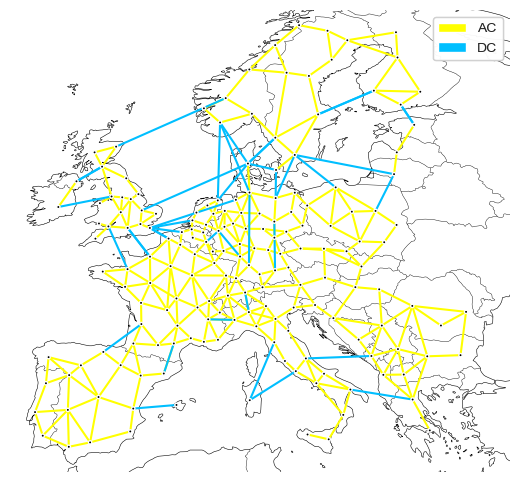

In [23]:
fig, ax = plt.subplots(1, 1, subplot_kw={"projection": ccrs.EqualEarth()}, figsize=(8, 6))

m_h2.plot(ax=ax, projection=ccrs.EqualEarth(), bus_colors="black", line_colors="yellow", link_colors="deepskyblue")
pypsa.plot.add_legend_patches(ax=ax, labels=["AC", "DC"], colors=["yellow","deepskyblue"])
plt.show()

In [24]:
m_h2.links[n_h2.links.carrier.isin(["H2 pipeline retrofitted" , "H2 pipeline"])]

bus0       bus1  \
Link                                                           
H2 pipeline retrofitted AL0 0 -> IT0 10  AL0 0 H2  IT0 10 H2   
H2 pipeline retrofitted AT0 0 -> AT0 2   AT0 0 H2   AT0 2 H2   
H2 pipeline retrofitted AT0 0 -> HU0 0   AT0 0 H2   HU0 0 H2   
H2 pipeline retrofitted AT0 0 -> SK0 0   AT0 0 H2   SK0 0 H2   
H2 pipeline retrofitted AT0 0 <-> AT0 2  AT0 0 H2   AT0 2 H2   
...                                           ...        ...   
H2 pipeline SE3 1 -> SE3 7               SE3 1 H2   SE3 7 H2   
H2 pipeline SE3 2 -> SE3 5               SE3 2 H2   SE3 5 H2   
H2 pipeline SE3 3 -> SE3 6               SE3 3 H2   SE3 6 H2   
H2 pipeline SE3 4 -> SE3 7               SE3 4 H2   SE3 7 H2   
H2 pipeline SE3 5 -> SE3 6               SE3 5 H2   SE3 6 H2   

                                                         carrier geometry  \
Link                                                                        
H2 pipeline retrofitted AL0 0 -> IT0 10  H2 pipeline retrofitted            
H2 pipeline retrofitted AT0 0 -> AT0 2   H2 pipeline retrofitted            
H2 pipeline retrofitted AT0 0 -> HU0 0   H2 pipeline retrofitted            
H2 pipeline retrofitted AT0 0 -> SK0 0   H2 pipeline retrofitted            
H2 pipeline retrofitted AT0 0 <-> AT0 2  H2 pipeline retrofitted            
...                                                          ...      ...   
H2 pipeline SE3 1 -> SE3 7                           H2 pipeline            
H2 pipeline SE3 2 -> SE3 5                           H2 pipeline            
H2 pipeline SE3 3 -> SE3 6                           H2 pipeline            
H2 pipeline SE3 4 -> SE3 7                           H2 pipeline            
H2 pipeline SE3 5 -> SE3 6                           H2 pipeline            

                                             length  p_nom  \
Link                                                         
H2 pipeline retrofitted AL0 0 -> IT0 10  254.011781    0.0   
H2 pipeline retrofitted AT0 0 -> AT0 2   228.454388    0.0   
H2 pipeline retrofitted AT0 0 -> HU0 0   274.453912    0.0   
H2 pipeline retrofitted AT0 0 -> SK0 0   372.071027    0.0   
H2 pipeline retrofitted AT0 0 <-> AT0 2  228.454388    0.0   
...                                             ...    ...   
H2 pipeline SE3 1 -> SE3 7               272.988128    0.0   
H2 pipeline SE3 2 -> SE3 5               141.983342    0.0   
H2 pipeline SE3 3 -> SE3 6               222.522966    0.0   
H2 pipeline SE3 4 -> SE3 7               161.813506    0.0   
H2 pipeline SE3 5 -> SE3 6               751.431228    0.0   

                                                                                      tags  \
Link                                                                                         
H2 pipeline retrofitted AL0 0 -> IT0 10                 INET_PL_669_EE_0_Seg_0_Seg_0_Seg_0   
H2 pipeline retrofitted AT0 0 -> AT0 2                                PLS_6292_Seg_0_Seg_0   
H2 pipeline retrofitted AT0 0 -> HU0 0   ST_929_Seg_0_Seg_0_Seg_1 PLS_4606_Seg_0_Seg_0_...   
H2 pipeline retrofitted AT0 0 -> SK0 0                            EntsoG_Map__ST_423_Seg_0   
H2 pipeline retrofitted AT0 0 <-> AT0 2                          PLL_709_Seg_0_Seg_0_Seg_3   
...                                                                                    ...   
H2 pipeline SE3 1 -> SE3 7                                                                   
H2 pipeline SE3 2 -> SE3 5                                                                   
H2 pipeline SE3 3 -> SE3 6                                                                   
H2 pipeline SE3 4 -> SE3 7                                                                   
H2 pipeline SE3 5 -> SE3 6                                                                   

                                         under_construction  underground  \
Link                                                                       
H2 pipeline retrofitted AL0 

## Installed Capacity, Generation, Consumption

In [65]:
cap_no = pd.DataFrame(index=n_no.buses.location.unique())
cap_h2 = pd.DataFrame(index=n_h2.buses.location.unique())

for n, df in zip([n_no, n_h2], [cap_no,cap_h2]):

    for c in n.generators.carrier.unique():
        # capacity in GW
        df[c] = capacity(n, c) / 1000

    for c in n.links.carrier.unique():
        # capacity in GW
        df[c] = capacity_links(n, c) / 1000

    for c in n.storage_units.carrier.unique():
        # capacity in GW
        df[c] = capacity_storage_units(n, c) / 1000

# condense groups
cap_no = get_condense_sum(cap_no, c1_groups, c1_groups_name)
cap_h2 = get_condense_sum(cap_h2, c1_groups, c1_groups_name)
# rename unhandy column names
cap_no.rename(columns=carrier_renaming, inplace=True)
cap_h2.rename(columns=carrier_renaming, inplace=True)

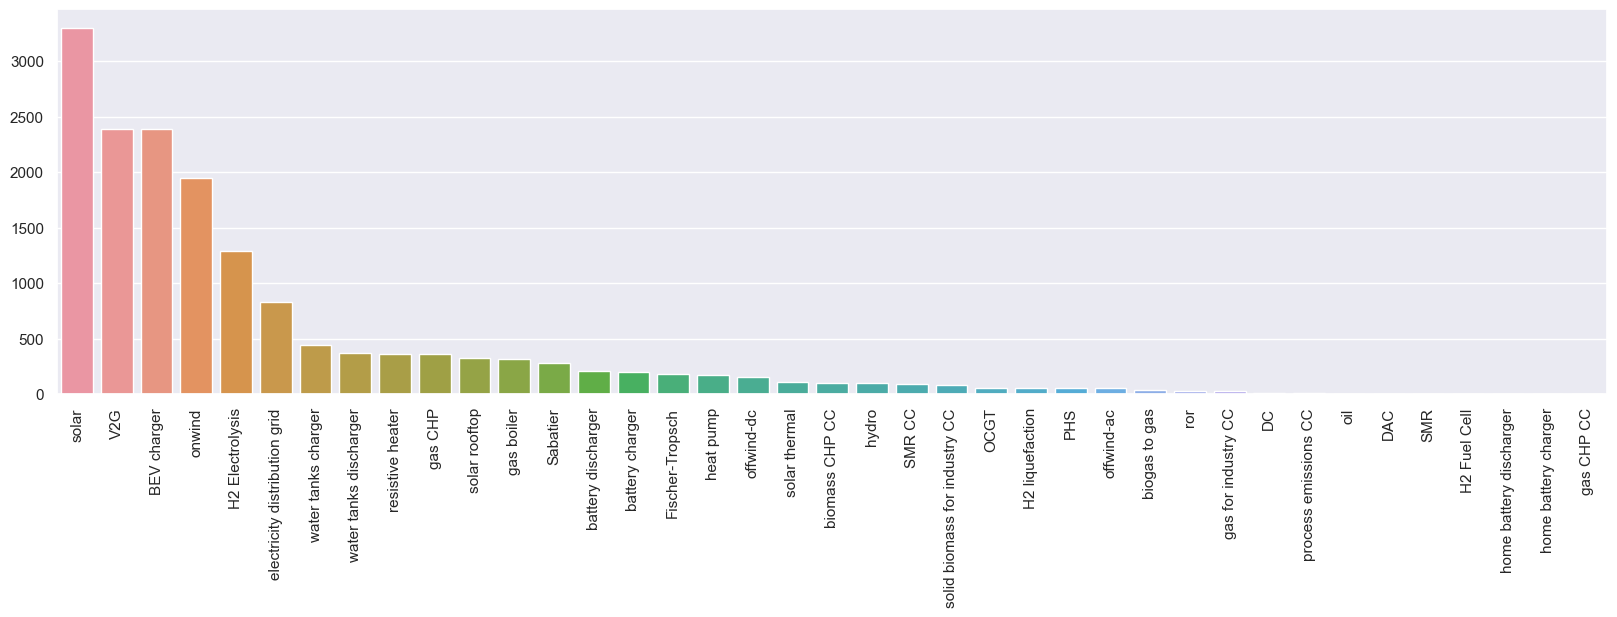

In [66]:
cap_no_sum = pd.DataFrame(cap_no.sum().sort_values(ascending=False)).transpose()
sns.set(rc={'figure.figsize': (20, 5)})
sns.barplot(data=cap_no_sum.iloc[: , 1:40])
ticks = plt.xticks(rotation=90)
plt.show()

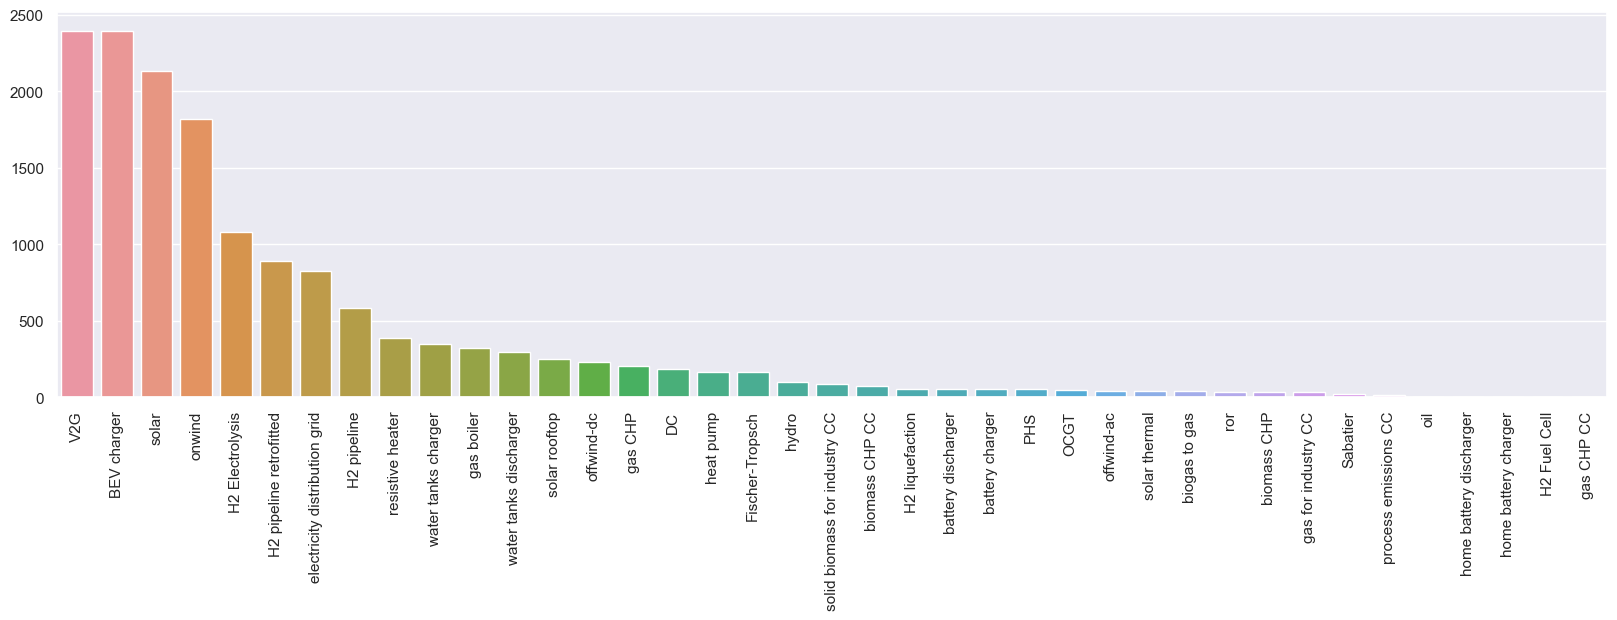

In [67]:
cap_h2_sum = pd.DataFrame(cap_h2.sum().sort_values(ascending=False)).transpose()
sns.set(rc={'figure.figsize': (20, 5)})
sns.barplot(data=cap_h2_sum.iloc[: , 1:40])
ticks = plt.xticks(rotation=90)
plt.show()

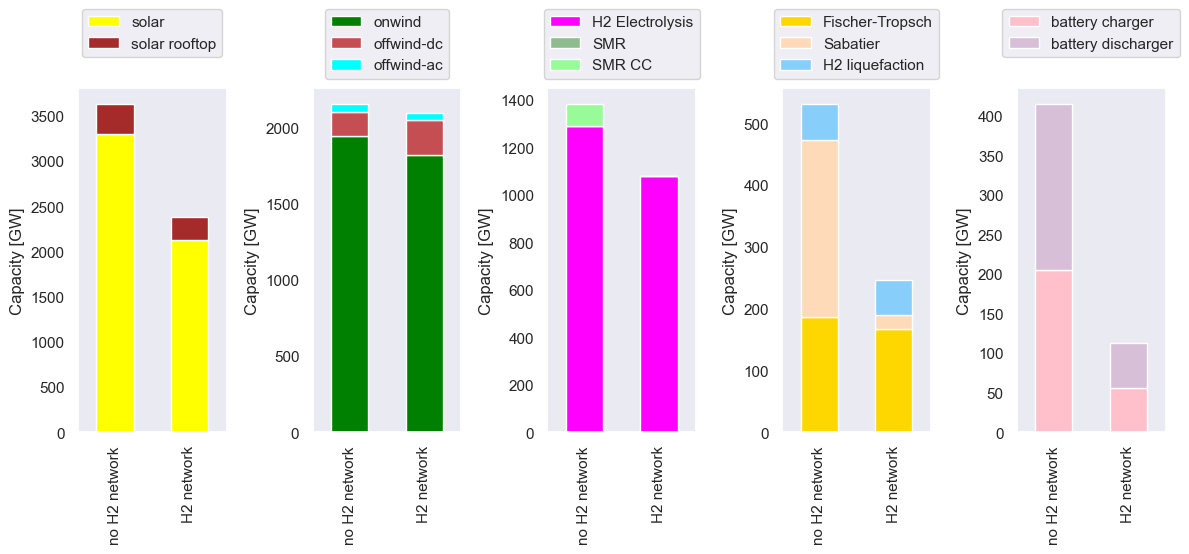

In [28]:
# thesis_plot

fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=5, figsize=(12, 6))
bbox = (0.5, 1.25)

carriers = ["solar" , "solar rooftop"]
get_df(cap_no_sum, cap_h2_sum, carriers).plot(ax = ax0, kind="bar", stacked=True, grid=False, color=[carrier_colors[c] for c in carriers], ylabel="Capacity [GW]")
ax0.legend(loc='upper center', bbox_to_anchor=bbox)

carriers = ["onwind", "offwind-dc", "offwind-ac"]
get_df(cap_no_sum, cap_h2_sum, carriers).plot(ax = ax1, kind="bar", stacked=True, grid=False, color=[carrier_colors[c] for c in carriers], ylabel="Capacity [GW]")
ax1.legend(loc='upper center', bbox_to_anchor=bbox)

carriers = ["H2 Electrolysis", "SMR", "SMR CC"]
get_df(cap_no_sum, cap_h2_sum, carriers).plot(ax = ax2, kind="bar", stacked=True, grid=False, color=[carrier_colors[c] for c in carriers], ylabel="Capacity [GW]")
ax2.legend(loc='upper center', bbox_to_anchor=bbox)

carriers = ["Fischer-Tropsch", "Sabatier", "H2 liquefaction"]
get_df(cap_no_sum, cap_h2_sum, carriers).plot(ax = ax3, kind="bar", stacked=True, grid=False, color=[carrier_colors[c] for c in carriers], ylabel="Capacity [GW]")
ax3.legend(loc='upper center', bbox_to_anchor=bbox)

carriers = ["battery charger", "battery discharger"]
get_df(cap_no_sum, cap_h2_sum, carriers).plot(ax = ax4, kind="bar", stacked=True, grid=False, color=[carrier_colors[c] for c in carriers], ylabel="Capacity [GW]")
ax4.legend(loc='upper center', bbox_to_anchor=bbox)

fig.tight_layout()
plt.show()

# fig.savefig(f"{PLOT_DIR}01_general/system_overview/capa_scenarios.png")

In [29]:
# magnitude is in GW
carriers = ["battery charger", "battery discharger"]
round(get_df(cap_no_sum, cap_h2_sum, carriers), 0).transpose() / round(get_df(cap_no_sum, cap_h2_sum, carriers), 0).transpose().sum()
# round(get_df(cap_no_sum, cap_h2_sum, carriers), 0).sum(axis=1)

no H2 network  H2 network
battery charger          0.493976    0.495575
battery discharger       0.506024    0.504425

In [71]:
# magnitude is in GW
carriers = ["H2 Fuel Cell"]
round(get_df(cap_no_sum, cap_h2_sum, carriers), 0).transpose()
# round(get_df(cap_no_sum, cap_h2_sum, carriers), 0).sum(axis=1)

no H2 network  H2 network
H2 Fuel Cell            1.0         0.0


Notes:
- 'H2 pipeline', 'H2 pipeline retrofitted' are the only difference in the carriers (n_no does not have them)
- H2 Fuel Cell Capacity is not really existent: capacity without H2 network is 1 GW and with H2 network it is 0


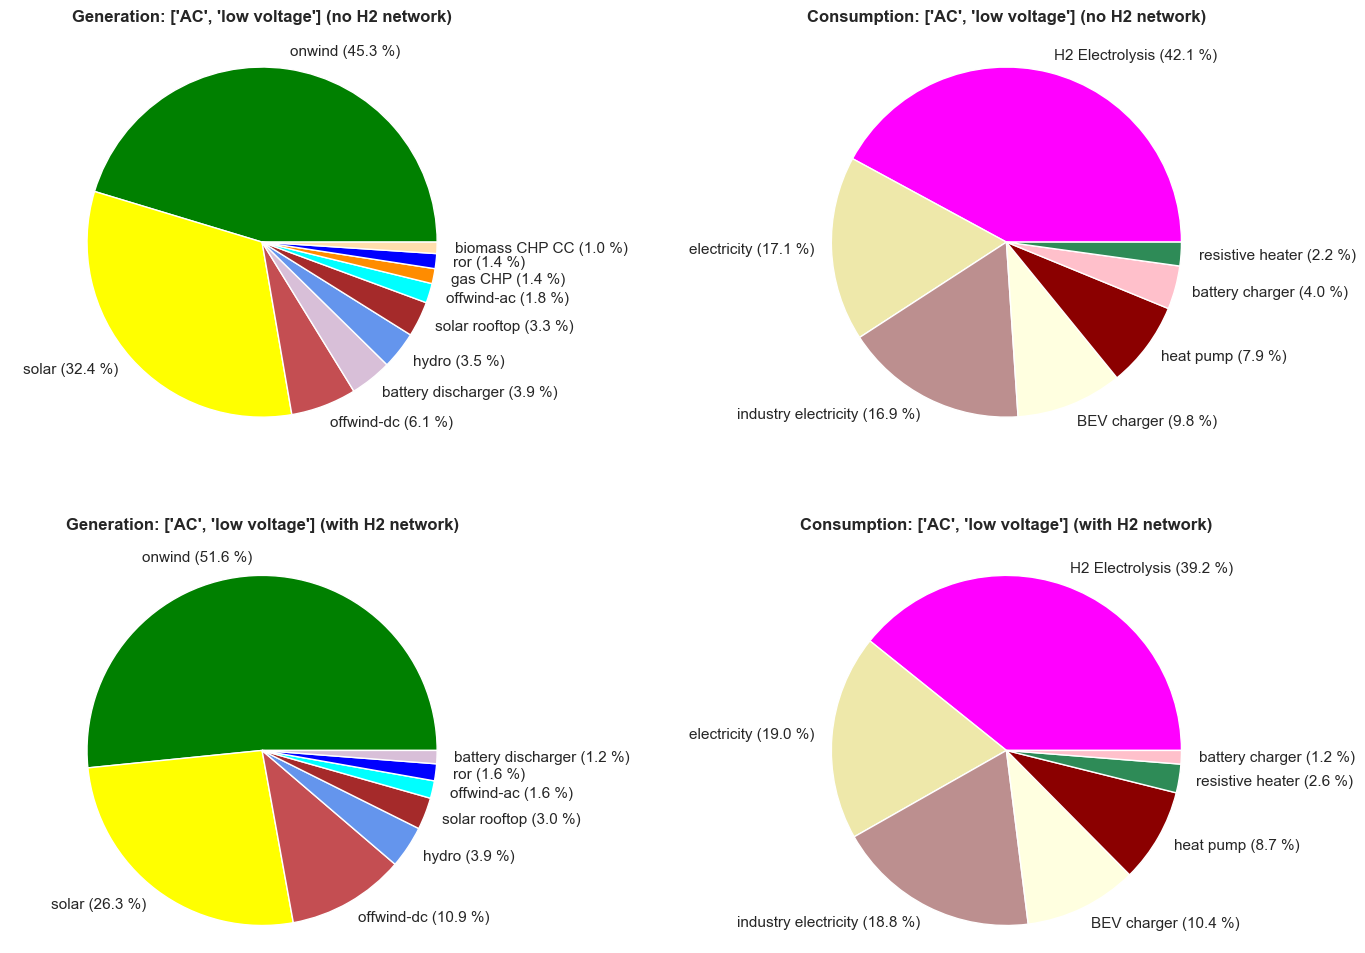

In [30]:
# thesis_plot:

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 11))

for n in [n_no, n_h2]:

    carrier = ["AC", "low voltage"]
    nb = nodal_balance(n, carrier=carrier, time="2013", aggregate=['component', 'bus'], energy=True)
    # convert from MW to GW
    nb = nb.unstack(level=[1]) / 1000
    # condense condense_groups
    nb = get_condense_sum(nb, c1_groups, c1_groups_name)
    # rename unhandy column names
    nb.rename(columns=carrier_renaming, inplace=True)

    nb_pos = nb.sum()[nb.sum() > 0].sort_values(ascending=False)
    # exclude all shares smaller than 1 %
    nb_pos = nb_pos[(nb_pos / nb_pos.sum()) > 0.01]

    nb_neg = abs(nb.sum()[nb.sum() < 0]).sort_values(ascending=False)
    # exclude all shares smaller than 1 %
    nb_neg = nb_neg[(nb_neg / nb_neg.sum()) > 0.01]

    if n==n_no:
        ax_gen=axs[0, 0]
        ax_con=axs[0, 1]
        title_gen=f"Generation: {carrier} (no H2 network)"
        title_con=f"Consumption: {carrier} (no H2 network)"

    elif n==n_h2:
        ax_gen=axs[1, 0]
        ax_con=axs[1, 1]
        title_gen=f"Generation: {carrier} (with H2 network)"
        title_con=f"Consumption: {carrier} (with H2 network)"

    # generation
    c = [carrier_colors[col] for col in nb_pos.index]
    percents = nb_pos.to_numpy() * 100 / nb_pos.to_numpy().sum()
    labels = ['%s (%1.1f %%)' % (l, s) for l, s in zip(nb_pos.index, percents)]

    patches, texts = ax_gen.pie(nb_pos, colors=c, startangle=0, labels=labels)
    ax_gen.axis('equal')
    ax_gen.set_title(title_gen, pad=20, fontweight="bold")

    # consumption
    c = [carrier_colors[col] for col in nb_neg.index]
    percents = nb_neg.to_numpy() * 100 / nb_neg.to_numpy().sum()
    labels = ['%s (%1.1f %%)' % (l, s) for l, s in zip(nb_neg.index, percents)]

    patches, texts = ax_con.pie(nb_neg, colors=c, startangle=0, labels=labels)
    ax_con.axis('equal')

    ax_con.set_title(title_con, pad=20, fontweight="bold")

fig.tight_layout(pad=5)
plt.show()

fig.savefig(f"{PLOT_DIR}01_general/system_overview/gen_con_ac_lowvoltage.png")

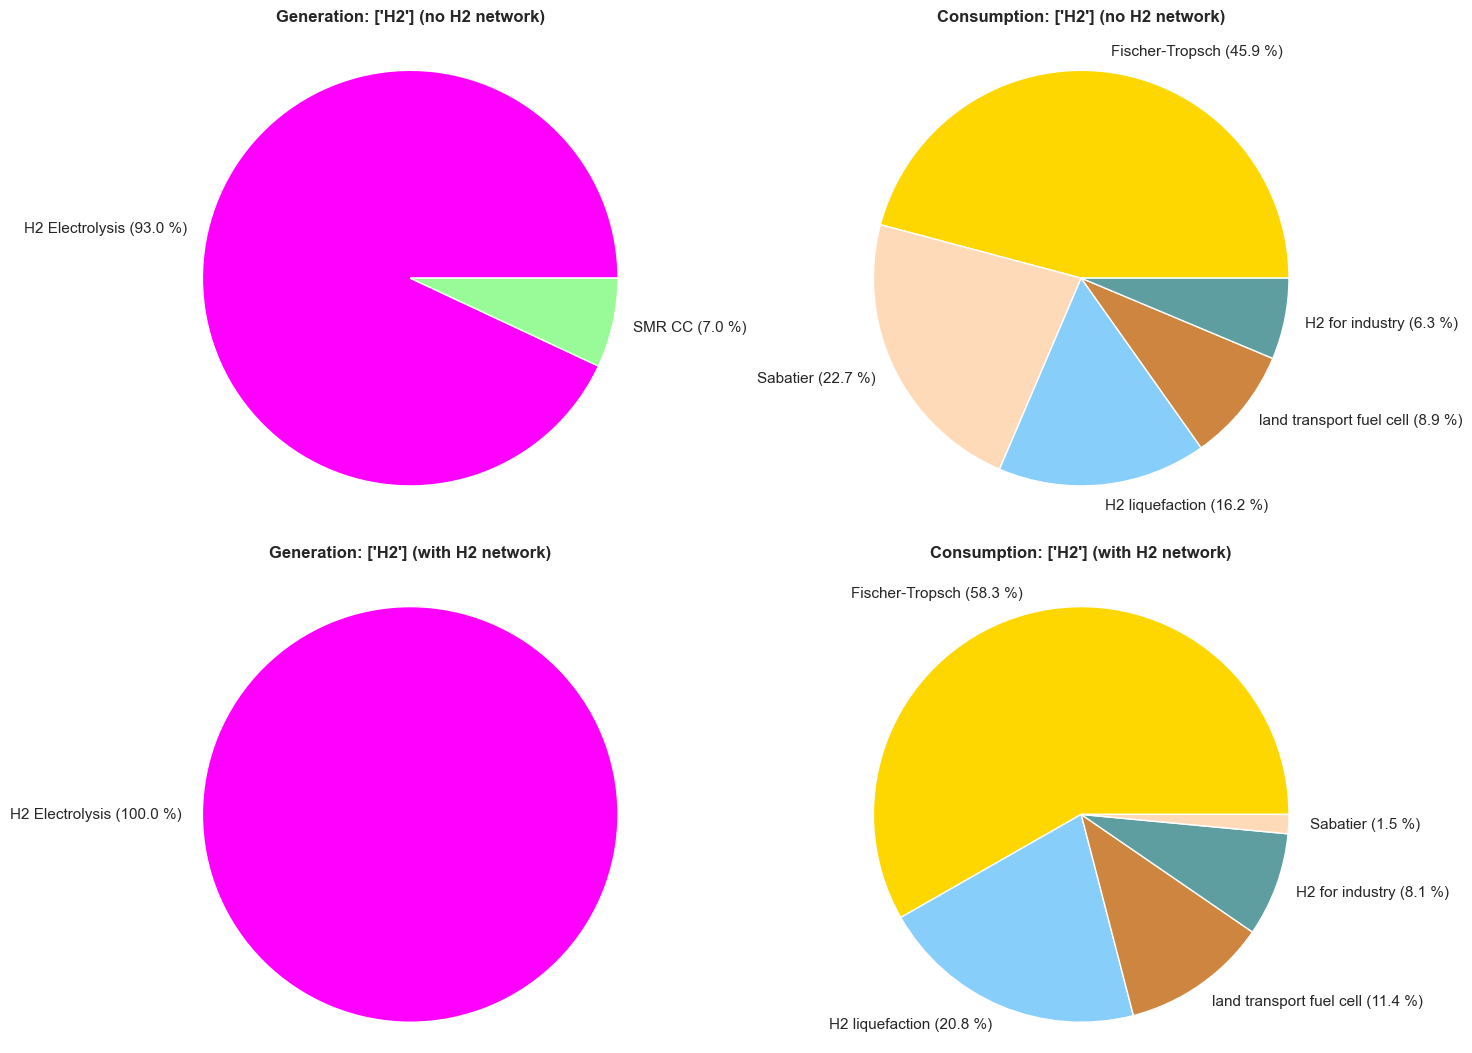

In [31]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 11))

for n in [n_no, n_h2]:

    carrier = ["H2"]
    nb = nodal_balance(n, carrier=carrier, time="2013", aggregate=['component', 'bus'], energy=True)
    # convert from MW to GW
    nb = nb.unstack(level=[1]) / 1000

    nb_pos = nb.sum()[nb.sum() > 0].sort_values(ascending=False)
    # exclude all shares smaller than 1 %
    nb_pos = nb_pos[(nb_pos / nb_pos.sum()) > 0.01]

    nb_neg = abs(nb.sum()[nb.sum() < 0]).sort_values(ascending=False)
    # exclude all shares smaller than 1 %
    nb_neg = nb_neg[(nb_neg / nb_neg.sum()) > 0.01]

    if n==n_no:
        ax_gen=axs[0, 0]
        ax_con=axs[0, 1]
        title_gen=f"Generation: {carrier} (no H2 network)"
        title_con=f"Consumption: {carrier} (no H2 network)"

    elif n==n_h2:
        ax_gen=axs[1, 0]
        ax_con=axs[1, 1]
        title_gen=f"Generation: {carrier} (with H2 network)"
        title_con=f"Consumption: {carrier} (with H2 network)"

    # generation
    c = [carrier_colors[col] for col in nb_pos.index]
    percents = nb_pos.to_numpy() * 100 / nb_pos.to_numpy().sum()
    labels = ['%s (%1.1f %%)' % (l, s) for l, s in zip(nb_pos.index, percents)]

    patches, texts = ax_gen.pie(nb_pos, colors=c, startangle=0, labels=labels)
    ax_gen.axis('equal')
    ax_gen.set_title(title_gen, pad=20, fontweight="bold")

    # consumption
    c = [carrier_colors[col] for col in nb_neg.index]
    percents = nb_neg.to_numpy() * 100 / nb_neg.to_numpy().sum()
    labels = ['%s (%1.1f %%)' % (l, s) for l, s in zip(nb_neg.index, percents)]

    patches, texts = ax_con.pie(nb_neg, colors=c, startangle=0, labels=labels)
    ax_con.axis('equal')

    ax_con.set_title(title_con, pad=20, fontweight="bold")

fig.tight_layout(pad=2)
plt.show()

fig.savefig(f"{PLOT_DIR}01_general/5.1_hydrogen_overview/gen_con_h2.png")

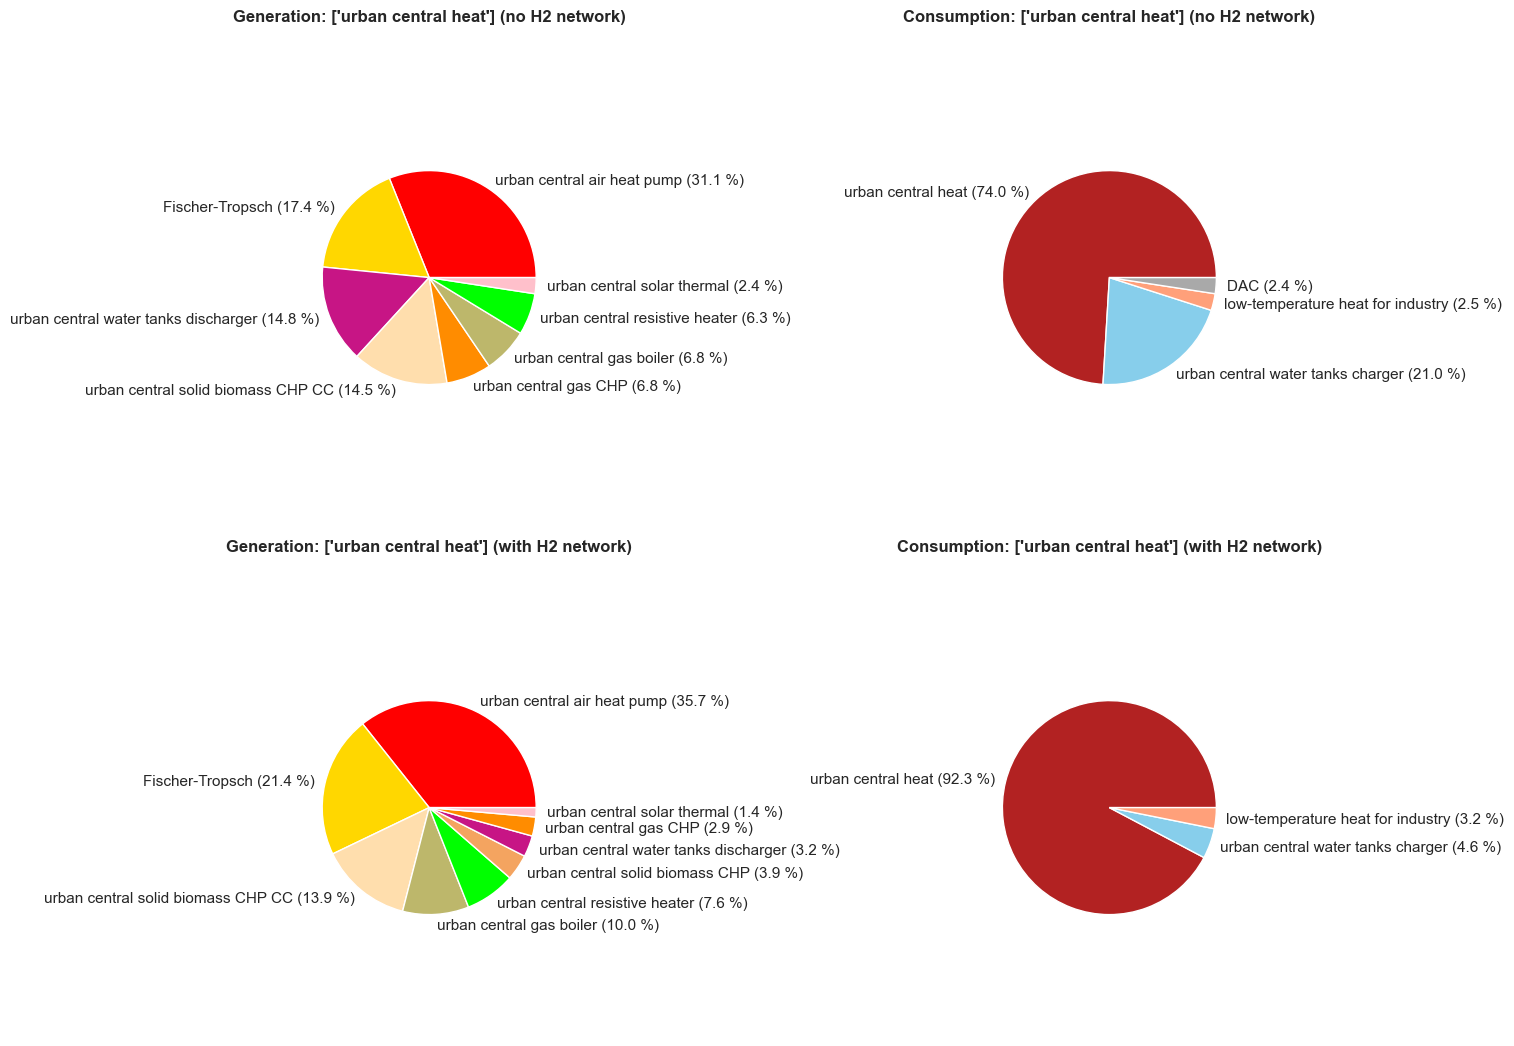

In [32]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 11))

for n in [n_no, n_h2]:

    carrier = ["urban central heat"]
    nb = nodal_balance(n, carrier=carrier, time="2013", aggregate=['component', 'bus'], energy=True)
    # convert from MW to GW
    nb = nb.unstack(level=[1]) / 1000

    nb_pos = nb.sum()[nb.sum() > 0].sort_values(ascending=False)
    # exclude all shares smaller than 1 %
    nb_pos = nb_pos[(nb_pos / nb_pos.sum()) > 0.01]

    nb_neg = abs(nb.sum()[nb.sum() < 0]).sort_values(ascending=False)
    # exclude all shares smaller than 1 %
    nb_neg = nb_neg[(nb_neg / nb_neg.sum()) > 0.01]

    if n==n_no:
        ax_gen=axs[0, 0]
        ax_con=axs[0, 1]
        title_gen=f"Generation: {carrier} (no H2 network)"
        title_con=f"Consumption: {carrier} (no H2 network)"

    elif n==n_h2:
        ax_gen=axs[1, 0]
        ax_con=axs[1, 1]
        title_gen=f"Generation: {carrier} (with H2 network)"
        title_con=f"Consumption: {carrier} (with H2 network)"

    # generation
    c = [carrier_colors[col] for col in nb_pos.index]
    percents = nb_pos.to_numpy() * 100 / nb_pos.to_numpy().sum()
    labels = ['%s (%1.1f %%)' % (l, s) for l, s in zip(nb_pos.index, percents)]

    patches, texts = ax_gen.pie(nb_pos, colors=c, startangle=0, labels=labels)
    ax_gen.axis('equal')
    ax_gen.set_title(title_gen, pad=20, fontweight="bold")

    # consumption
    c = [carrier_colors[col] for col in nb_neg.index]
    percents = nb_neg.to_numpy() * 100 / nb_neg.to_numpy().sum()
    labels = ['%s (%1.1f %%)' % (l, s) for l, s in zip(nb_neg.index, percents)]

    patches, texts = ax_con.pie(nb_neg, colors=c, startangle=0, labels=labels)
    ax_con.axis('equal')

    ax_con.set_title(title_con, pad=20, fontweight="bold")

fig.tight_layout(pad=2)
plt.show()

# Fischer Tropsch nebenprdukt Heat

#### Correlation of Capacity

In [33]:
c = "H2 Fuel Cell"
diff = cap_no.corr()[c].sort_values(ascending=False) - cap_h2.corr()[c].sort_values(ascending=False)
diff.sort_values(ascending=False)

home battery discharger          0.658372
home battery charger             0.658372
H2 Electrolysis                  0.474976
onwind                           0.386904
offwind-dc                       0.175323
solar                            0.156019
battery charger                  0.053114
battery discharger               0.053114
H2 Fuel Cell                     0.000000
H2 liquefaction                 -0.000923
offwind-ac                      -0.013925
SMR                             -0.024856
resistive heater                -0.057309
DC                              -0.068172
solar thermal                   -0.071586
electricity distribution grid   -0.152008
solar rooftop                   -0.182676
ror                             -0.196922
OCGT                            -0.201210
water tanks discharger          -0.202876
gas boiler                      -0.203392
hydro                           -0.216122
heat pump                       -0.224990
water tanks charger             -0

In [34]:
cap_no.corr()["H2 Fuel Cell"].sort_values(ascending=False)

H2 Fuel Cell                     1.000000
offwind-dc                       0.185883
water tanks charger              0.180537
water tanks discharger           0.174997
offwind-ac                       0.174009
gas CHP CC                       0.072577
gas CHP                          0.067768
H2 Electrolysis                  0.050625
onwind                           0.045487
solar                            0.043194
biomass CHP                      0.032378
solar rooftop                    0.026883
gas boiler                       0.025239
battery charger                  0.019802
battery discharger               0.019802
OCGT                             0.013183
resistive heater                -0.002469
BEV charger                     -0.008985
V2G                             -0.008985
electricity distribution grid   -0.009763
heat pump                       -0.016266
SMR                             -0.025430
solar thermal                   -0.029595
home battery discharger         -0

In [35]:
cap_h2.corr()["H2 Fuel Cell"].sort_values(ascending=False)

H2 Fuel Cell                     1.000000
gas CHP CC                       0.962514
biomass CHP                      0.557863
biomass CHP CC                   0.508448
water tanks charger              0.411249
water tanks discharger           0.377872
gas CHP                          0.321061
SMR CC                           0.261927
V2G                              0.242077
BEV charger                      0.242077
gas boiler                       0.228631
OCGT                             0.214394
solar rooftop                    0.209559
heat pump                        0.208724
offwind-ac                       0.187934
electricity distribution grid    0.142245
ror                              0.138355
PHS                              0.089424
resistive heater                 0.054841
H2 pipeline retrofitted          0.044022
solar thermal                    0.041991
offwind-dc                       0.010559
SMR                             -0.000574
H2 liquefaction                 -0

In [36]:
# check correlation of capacities to check at which locations similar technologies are present
fig = plt.figure(figsize=(28, 14))
# sns.heatmap(cap_no.corr()[abs(cap_no.corr() > 0.01)], annot=True)
sns.heatmap(cap_no.corr().loc["solar"], annot=True)
plt.show()
# fig.savefig(f"{PLOT_DIR}01_general/system_overview/no_h2_capa_corr.png")

IndexError: Inconsistent shape between the condition and the input (got (44, 1) and (44,))

<Figure size 2800x1400 with 0 Axes>

In [ ]:
# check correlation of capacities to check at which location similar technologies are present
fig = plt.figure(figsize=(28, 14))
sns.heatmap(cap_h2.corr()[abs(cap_h2.corr()) > 0.1], annot=True)
plt.show()
fig.savefig(f"{PLOT_DIR}01_general/system_overview/h2_capa_corr.png")

In [ ]:
fig = plt.figure(figsize=(28, 14))
diff_cap = cap_no.corr() - cap_h2.corr()
sns.heatmap(diff_cap[abs(diff_cap) > 0.5], annot=True)
plt.show()
fig.savefig(f"{PLOT_DIR}01_general/system_overview/capa_corr_diff_no_minus_h2.png")

Findings:
- In both scenarios is the correlation in capacity of H2 Electrolysis and onwind high (no: 0.67; h2: 0.76)
- Correlation of H2 Electrolysis and solar: (no: 0.32; h2: 0.37)
- Correlation of battery charger and solar: (no: 0.59; h2: 0.54)
- Correlation H2 Fuel cell and home battery charger discharger: (no: -0.032; h2: -0.69)

#### Capacity Coverage (%)
- calc capacities in percentage
- calc the min(capA, capB) for every location to see how many percentage points are present at a location from both technologies. If it is 100, the distributio of capacity is the same, if it is 0, there is no capacity present of technology A at the same location where capacity of technology B is present.
- measure the similarity of the distribution
how to calc that?

In [ ]:
# Note: gas, oil, sabatier, biogas to gas, ... only have capacity at EU bus

cap_no_perc = pd.DataFrame(cap_no.fillna(0) / cap_no.fillna(0).sum())
cap_h2_perc = pd.DataFrame(cap_h2.fillna(0) / cap_h2.fillna(0).sum())

# exclude all carriers that only have capacity at EU bus
cap_no_perc = cap_no_perc[cap_no_perc.columns[cap_no_perc.loc["EU"]!=1]]
cap_h2_perc = cap_h2_perc[cap_h2_perc.columns[cap_h2_perc.loc["EU"]!=1]]

# drop EU row
cap_no_perc.drop("EU", inplace=True)
cap_h2_perc.drop("EU", inplace=True)

cap_no_cc = pd.DataFrame(index=cap_no_perc.columns, columns=cap_no_perc.columns)
cap_h2_cc = pd.DataFrame(index=cap_h2_perc.columns, columns=cap_h2_perc.columns)

for c1 in cap_no_cc.columns:
    for c2 in cap_no_cc.index:
        cap_no_cc.loc[c1, c2] = cap_no_perc[[c1, c2]].min(axis=1).sum()

for c1 in cap_h2_cc.columns:
    for c2 in cap_h2_cc.index:
        cap_h2_cc.loc[c1, c2] = cap_h2_perc[[c1, c2]].min(axis=1).sum()

# convert to float
cap_no_cc = cap_no_cc.astype(float)
cap_h2_cc = cap_h2_cc.astype(float)

In [ ]:
fig = plt.figure(figsize=(28, 14))
sns.heatmap(cap_no_cc[cap_no_cc >0.8], annot=True)
plt.show()

In [ ]:
fig = plt.figure(figsize=(28, 14))
sns.heatmap(cap_h2_cc[cap_h2_cc > 0.8], annot=True)
plt.show()

In [ ]:
round(cap_no_cc - cap_h2_cc.loc[cap_no_cc.index, cap_no_cc.columns], 2)

In [ ]:
fig = plt.figure(figsize=(28, 14))
diff_cc = round(cap_no_cc - cap_h2_cc.loc[cap_no_cc.index, cap_no_cc.columns], 2)
sns.heatmap(diff_cc[abs(diff_cc) > 0.5], annot=True)
plt.show()

## Energy Flow

In [ ]:
# plot map with overall balance of hydrogen and electricity per region

![](../../../../Pictures/Screenshots/Screenshot_20230215_101123.png)

In [ ]:
# Figure 6 in Neumann paper
carrier = ["AC", "low voltage"]
nb = nodal_balance(n_no, carrier=carrier, time="2013", aggregate=["component", "carrier", "snapshot"], energy=True)

![](../../../../Pictures/Screenshots/Screenshot_20230215_101816.png)

# 4.2 Important Technologies and their role

## Electricity balance (May)

In [236]:
carrier = ["AC", "low voltage"]
loads = ["electricity", "industry electricity", "agriculture electricity"]
period = "2013-05"
nb_el_no = nodal_balance(n_no, carrier = carrier, time=period, aggregate=['component', 'bus'], energy=True)  # in units of energy
nb_el_h2 = nodal_balance(n_h2, carrier = carrier, time=period, aggregate=['component', 'bus'], energy=True)  # in units of energy
# convert from MW to GW and unstack
nb_el_no = nb_el_no.unstack(level=[1]) / 1000
nb_el_h2 = nb_el_h2.unstack(level=[1]) / 1000
loads_el_no = abs(nb_el_no[loads].sum(axis=1))
loads_el_h2 = abs(nb_el_h2[loads].sum(axis=1))
nb_el_no.drop(loads, axis=1, inplace=True)
nb_el_h2.drop(loads, axis=1, inplace=True)

# condense groups
nb_el_no = get_condense_sum(nb_el_no, c1_groups, c1_groups_name)
nb_el_h2 = get_condense_sum(nb_el_h2, c1_groups, c1_groups_name)
# rename unhandy column names
nb_el_no.rename(columns=carrier_renaming, inplace=True)
nb_el_h2.rename(columns=carrier_renaming, inplace=True)

nb_el_no.head(3)

carrier                        AC  BEV charger       DAC            DC  \
snapshot                                                                 
2013-05-01 00:00:00  1.728040e-14   -55.936232 -4.846786  1.364242e-15   
2013-05-01 03:00:00  7.275958e-15   -50.782888 -4.846752 -2.273737e-16   
2013-05-01 06:00:00  5.456968e-15  -352.207515 -4.846783  2.273737e-16   

carrier              H2 Electrolysis  H2 Fuel Cell        PHS        V2G  \
snapshot                                                                   
2013-05-01 00:00:00      -709.514501           NaN   4.023339  29.945463   
2013-05-01 03:00:00      -671.842886           NaN   7.678835  21.005248   
2013-05-01 06:00:00     -1932.708992           NaN -66.944392   7.030831   

carrier              battery charger  battery discharger  ...  solar rooftop  \
snapshot                                                  ...                  
2013-05-01 00:00:00        -0.997366          222.558061  ...            NaN   
2013-05-01 03:00:00        -0.124167          200.931540  ...       9.973257   
2013-05-01 06:00:00      -231.662255            0.682652  ...     243.879720   

carrier              gas CHP  gas CHP CC  biomass CHP CC  resistive heater  \
snapshot                                                                     
2013-05-01 00:00:00      NaN         NaN        2.601915         -1.135108   
2013-05-01 03:00:00      NaN         NaN       12.405591         -8.685297   
2013-05-01 06:00:00      NaN         NaN        0.005410        -28.003127   

carrier              gas boiler   heat pump  water tanks charger  \
snapshot                                                           
2013-05-01 00:00:00         0.0 -230.271011                  0.0   
2013-05-01 03:00:00         0.0 -303.697183                  0.0   
2013-05-01 06:00:00         0.0 -302.569416                  0.0   

carrier              water tanks discharger  solar thermal  
snapshot                                                    
2013-05-01 00:00:00                     0.0            0.0  
2013-05-01 03:00:00                     0.0            0.0  
2013-05-01 06:00:00                     0.0            0.0  

[3 rows x 28 columns]

In [237]:
# differences
nb_el_no.columns.difference(nb_el_h2.columns)

Index(['DAC', 'H2 Fuel Cell', 'gas CHP', 'gas CHP CC'], dtype='object', name='carrier')

- network without H2 grid has no 'biomass CHP'
- network with H2 grid has no Direct Air Capture, no H2 Fuel Cell, no gas CHP and no cas CHP CC

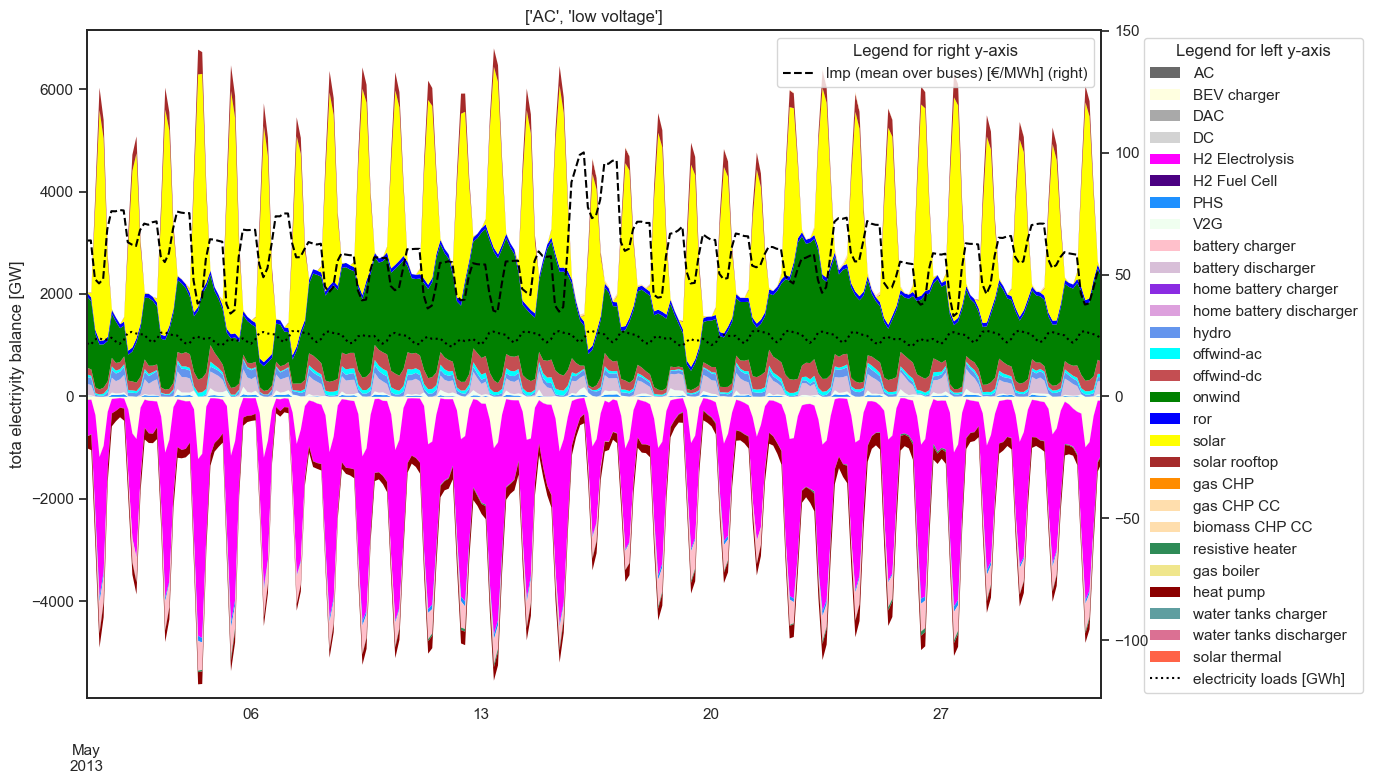

In [238]:
fig, ax = plt.subplots(figsize=(14, 8))

n = n_no
df = nb_el_no
df_loads = loads_el_no

# split into df with positive and negative values and get colors
df_neg, df_pos = df.clip(upper=0), df.clip(lower=0)
c_neg, c_pos = [carrier_colors[col] for col in df_neg.columns], [carrier_colors[col] for col in df_pos.columns]

# plot positive values
ax = df_pos.plot.area(ax=ax, stacked=True, color=c_pos, linewidth=0.)

# rename negative values so that they are not shown and plot negative values
ax = df_neg.rename(columns=lambda x: '_' + x).plot.area(ax=ax, stacked=True, color=c_neg, linewidth=0.)

# plot lmps
lmps = n.buses_t.marginal_price[n.buses[n.buses.carrier.isin(carrier)].index].mean(axis=1)[period]
ax2 = lmps.plot(style="--", color="black", label="lmp (mean over buses) [€/MWh]", secondary_y=True)
ax2.grid(False)
# set limits of secondary y-axis
ax2.set_ylim([ - 1.5 * lmps.max() * abs(df_neg.sum(axis=1).min()) /  df_pos.sum(axis=1).max() , 1.5 * lmps.max()])

# plot loads
df_loads.plot(style=":", color="black", label="electricity loads [GWh]")

# rescale the y-axis
ax.set_ylim([1.05*df_neg.sum(axis=1).min(), 1.05*df_pos.sum(axis=1).max()])
ax.legend(ncol=1, loc="upper center", bbox_to_anchor=(1.15, 1), title="Legend for left y-axis")
ax2.legend(title="Legend for right y-axis",  loc="upper right")
ax.set_ylabel("tota electriyity balance [GW]")
ax.set_xlabel("")
ax.set_title(f"{carrier}")
fig.tight_layout()

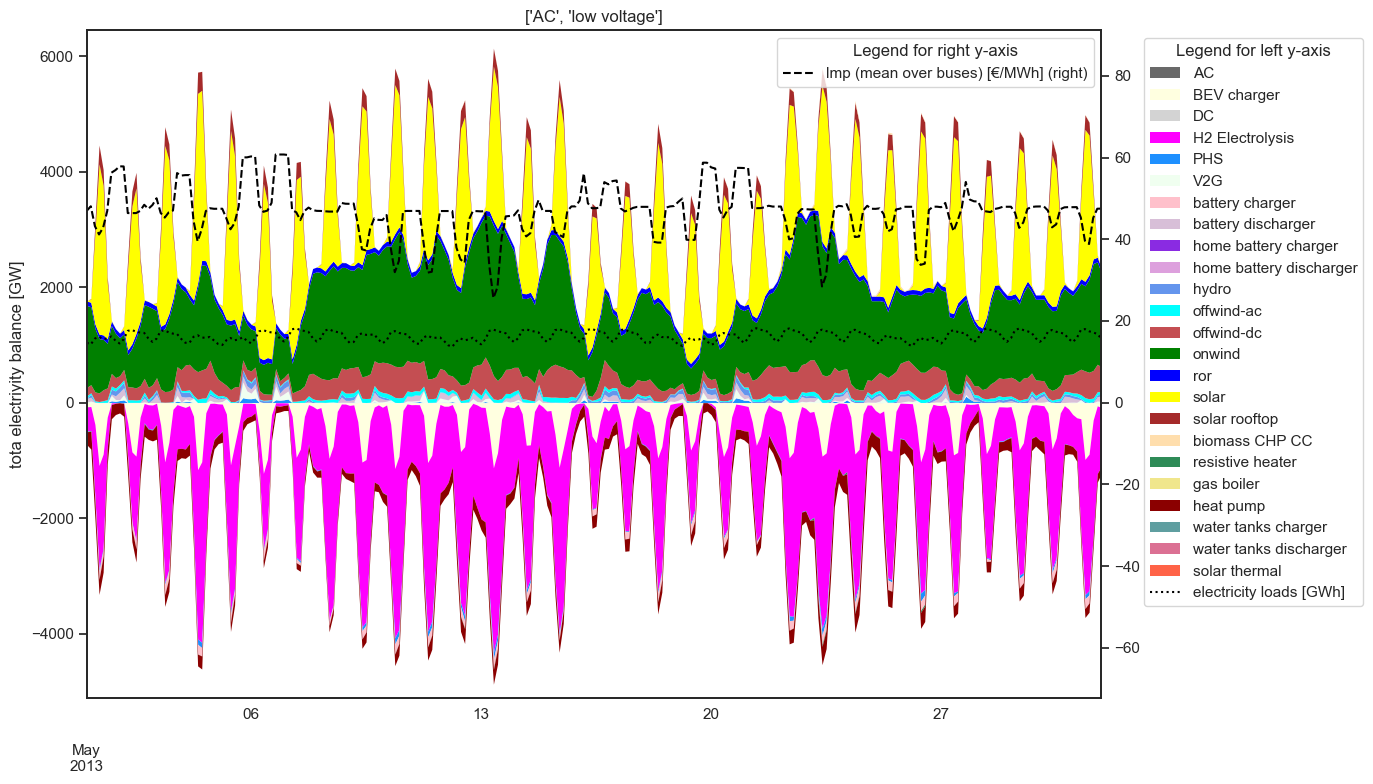

In [239]:
fig, ax = plt.subplots(figsize=(14, 8))

n = n_h2
df = nb_el_h2
df_loads = loads_el_h2

# split into df with positive and negative values and get colors
df_neg, df_pos = df.clip(upper=0), df.clip(lower=0)
c_neg, c_pos = [carrier_colors[col] for col in df_neg.columns], [carrier_colors[col] for col in df_pos.columns]

# plot positive values
ax = df_pos.plot.area(ax=ax, stacked=True, color=c_pos, linewidth=0.)

# rename negative values so that they are not shown and plot negative values
ax = df_neg.rename(columns=lambda x: '_' + x).plot.area(ax=ax, stacked=True, color=c_neg, linewidth=0.)

# plot lmps
lmps = n.buses_t.marginal_price[n.buses[n.buses.carrier.isin(carrier)].index].mean(axis=1)[period]
ax2 = lmps.plot(style="--", color="black", label="lmp (mean over buses) [€/MWh]", secondary_y=True)
ax2.grid(False)
# set limits of secondary y-axis
ax2.set_ylim([ - 1.5 * lmps.max() * abs(df_neg.sum(axis=1).min()) /  df_pos.sum(axis=1).max() , 1.5 * lmps.max()])

# plot loads
df_loads.plot(style=":", color="black", label="electricity loads [GWh]")

# rescale the y-axis
ax.set_ylim([1.05*df_neg.sum(axis=1).min(), 1.05*df_pos.sum(axis=1).max()])
ax.legend(ncol=1, loc="upper center", bbox_to_anchor=(1.15, 1), title="Legend for left y-axis")
ax2.legend(title="Legend for right y-axis",  loc="upper right")
ax.set_ylabel("tota electriyity balance [GW]")
ax.set_xlabel("")
ax.set_title(f"{carrier}")
fig.tight_layout()

## Electricity Balance (Jan)

In [240]:
carrier = ["AC", "low voltage"]
loads = ["electricity", "industry electricity", "agriculture electricity"]
period = "2013-01"
nb_el_no = nodal_balance(n_no, carrier = carrier, time=period, aggregate=['component', 'bus'], energy=True)  # in units of energy
nb_el_h2 = nodal_balance(n_h2, carrier = carrier, time=period, aggregate=['component', 'bus'], energy=True)  # in units of energy
# convert from MW to GW and unstack
nb_el_no = nb_el_no.unstack(level=[1]) / 1000
nb_el_h2 = nb_el_h2.unstack(level=[1]) / 1000
loads_el_no = abs(nb_el_no[loads].sum(axis=1))
loads_el_h2 = abs(nb_el_h2[loads].sum(axis=1))
nb_el_no.drop(loads, axis=1, inplace=True)
nb_el_h2.drop(loads, axis=1, inplace=True)

# condense groups
nb_el_no = get_condense_sum(nb_el_no, c1_groups, c1_groups_name)
nb_el_h2 = get_condense_sum(nb_el_h2, c1_groups, c1_groups_name)
# rename unhandy column names
nb_el_no.rename(columns=carrier_renaming, inplace=True)
nb_el_h2.rename(columns=carrier_renaming, inplace=True)

nb_el_no.head(3)

carrier                        AC  BEV charger       DAC            DC  \
snapshot                                                                 
2013-01-01 00:00:00  1.182343e-14  -471.667750 -4.701310  1.818989e-15   
2013-01-01 03:00:00  1.455192e-14  -339.458588 -4.701299 -2.728484e-15   
2013-01-01 06:00:00 -2.182787e-14  -459.324499 -4.701317  2.273737e-15   

carrier              H2 Electrolysis  H2 Fuel Cell  OCGT       PHS       V2G  \
snapshot                                                                       
2013-01-01 00:00:00     -2086.685643           NaN   NaN -8.191668  5.377617   
2013-01-01 03:00:00     -1902.041094           NaN   NaN  2.064618  7.421831   
2013-01-01 06:00:00     -1845.437240           NaN   NaN -9.096095  1.615203   

carrier              battery charger  ...  solar rooftop    gas CHP  \
snapshot                              ...                             
2013-01-01 00:00:00       -27.560361  ...            NaN  26.784181   
2013-01-01 03:00:00       -30.929961  ...            NaN  42.072599   
2013-01-01 06:00:00      -102.300655  ...      52.107755   7.057945   

carrier              gas CHP CC  biomass CHP CC  resistive heater  gas boiler  \
snapshot                                                                        
2013-01-01 00:00:00    0.002446       72.685865        -50.220569         0.0   
2013-01-01 03:00:00    0.002457       73.037867       -218.312261         0.0   
2013-01-01 06:00:00    0.002455       73.186171       -273.810208         0.0   

carrier               heat pump  water tanks charger  water tanks discharger  \
snapshot                                                                       
2013-01-01 00:00:00 -403.124125                  0.0                     0.0   
2013-01-01 03:00:00 -488.455926                  0.0                     0.0   
2013-01-01 06:00:00 -498.409860                  0.0                     0.0   

carrier              solar thermal  
snapshot                            
2013-01-01 00:00:00            0.0  
2013-01-01 03:00:00            0.0  
2013-01-01 06:00:00            0.0  

[3 rows x 29 columns]

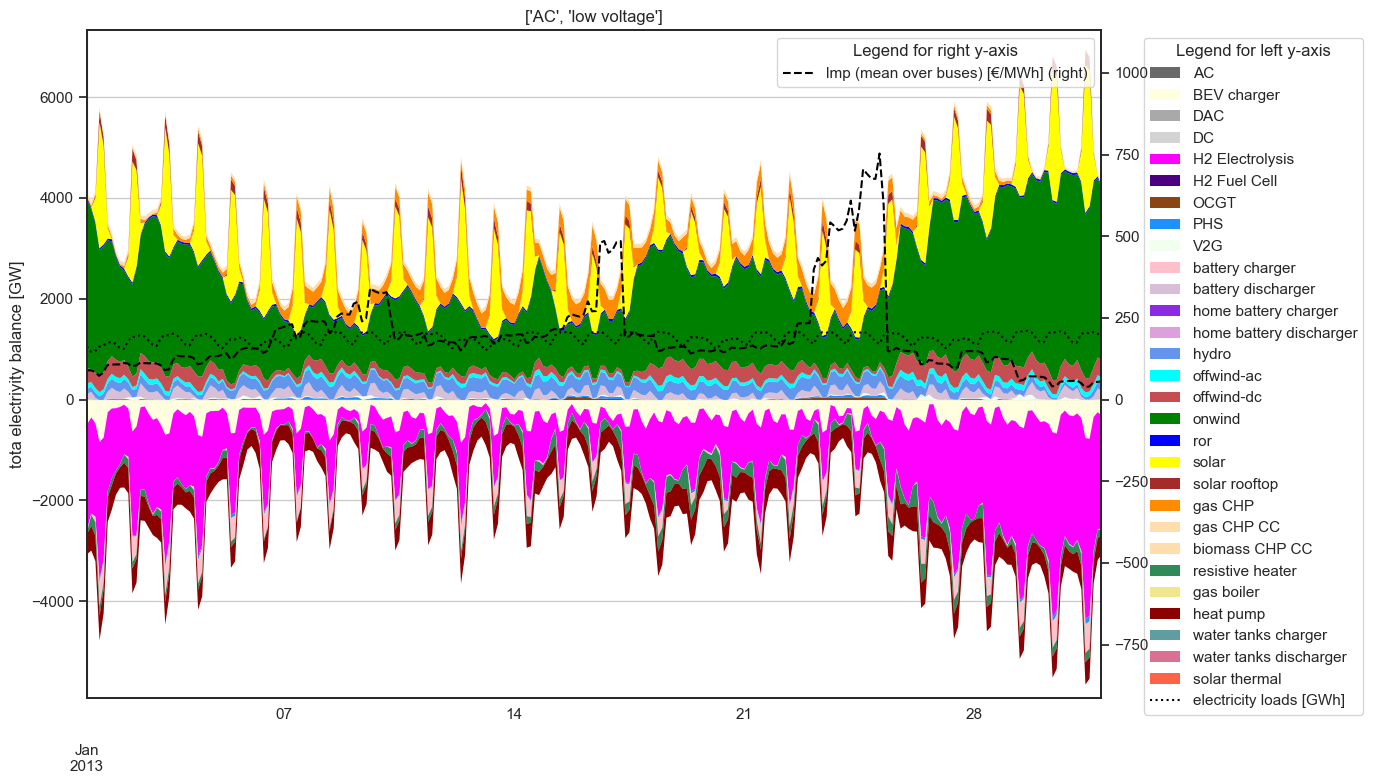

In [241]:
fig, ax = plt.subplots(figsize=(14, 8))

n = n_no
df = nb_el_no
df_loads = loads_el_no

# split into df with positive and negative values and get colors
df_neg, df_pos = df.clip(upper=0), df.clip(lower=0)
c_neg, c_pos = [carrier_colors[col] for col in df_neg.columns], [carrier_colors[col] for col in df_pos.columns]

# plot positive values
ax = df_pos.plot.area(ax=ax, stacked=True, color=c_pos, linewidth=0.)

# rename negative values so that they are not shown and plot negative values
ax = df_neg.rename(columns=lambda x: '_' + x).plot.area(ax=ax, stacked=True, color=c_neg, linewidth=0.)

# plot lmps
lmps = n.buses_t.marginal_price[n.buses[n.buses.carrier.isin(carrier)].index].mean(axis=1)[period]
ax2 = lmps.plot(style="--", color="black", label="lmp (mean over buses) [€/MWh]", secondary_y=True)
ax2.grid(False)
# set limits of secondary y-axis
ax2.set_ylim([ - 1.5 * lmps.max() * abs(df_neg.sum(axis=1).min()) /  df_pos.sum(axis=1).max() , 1.5 * lmps.max()])

# plot loads
df_loads.plot(style=":", color="black", label="electricity loads [GWh]")

# rescale the y-axis
ax.set_ylim([1.05*df_neg.sum(axis=1).min(), 1.05*df_pos.sum(axis=1).max()])
ax.legend(ncol=1, loc="upper center", bbox_to_anchor=(1.15, 1), title="Legend for left y-axis")
ax2.legend(title="Legend for right y-axis",  loc="upper right")
ax.set_ylabel("tota electriyity balance [GW]")
ax.set_xlabel("")
ax.grid(True)
ax.set_title(f"{carrier}")
fig.tight_layout()

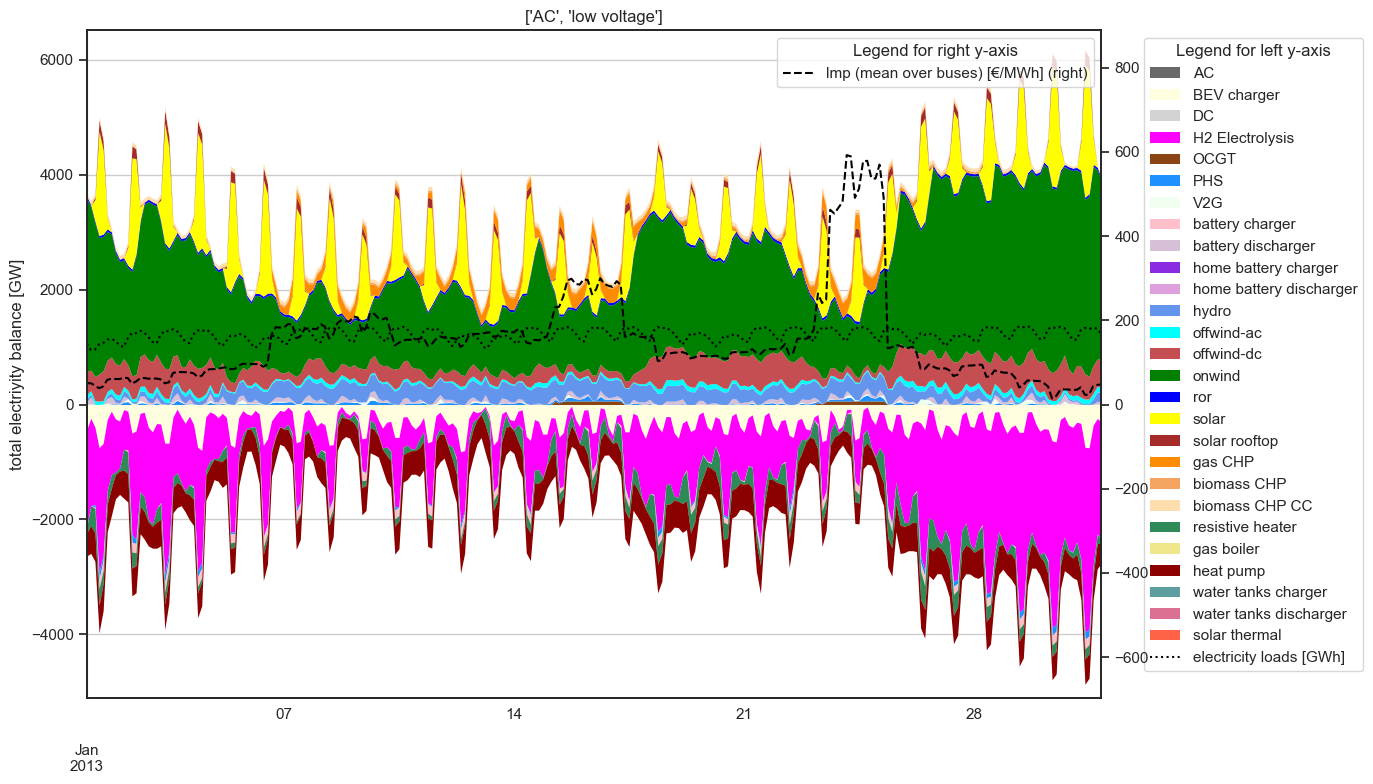

In [242]:
fig, ax = plt.subplots(figsize=(14, 8))

n = n_h2
df = nb_el_h2
df_loads = loads_el_h2

# split into df with positive and negative values and get colors
df_neg, df_pos = df.clip(upper=0), df.clip(lower=0)
c_neg, c_pos = [carrier_colors[col] for col in df_neg.columns], [carrier_colors[col] for col in df_pos.columns]

# plot positive values
ax = df_pos.plot.area(ax=ax, stacked=True, color=c_pos, linewidth=0.)

# rename negative values so that they are not shown and plot negative values
ax = df_neg.rename(columns=lambda x: '_' + x).plot.area(ax=ax, stacked=True, color=c_neg, linewidth=0.)

# plot lmps
lmps = n.buses_t.marginal_price[n.buses[n.buses.carrier.isin(carrier)].index].mean(axis=1)[period]
ax2 = lmps.plot(style="--", color="black", label="lmp (mean over buses) [€/MWh]", secondary_y=True)

# set limits of secondary y-axis
ax2.set_ylim([ - 1.5 * lmps.max() * abs(df_neg.sum(axis=1).min()) /  df_pos.sum(axis=1).max() , 1.5 * lmps.max()])

# plot loads
df_loads.plot(style=":", color="black", label="electricity loads [GWh]")

# rescale the y-axis
ax.set_ylim([1.05*df_neg.sum(axis=1).min(), 1.05*df_pos.sum(axis=1).max()])
ax.legend(ncol=1, loc="upper center", bbox_to_anchor=(1.15, 1), title="Legend for left y-axis")
ax2.legend(title="Legend for right y-axis",  loc="upper right")
ax.set_ylabel("total electriyity balance [GW]")
ax.set_xlabel("")
ax.grid(True)
ax.set_title(f"{carrier}")
fig.tight_layout()

## Electricity balance (all year)

In [243]:
carrier = ["AC", "low voltage"]
loads = ["electricity", "industry electricity", "agriculture electricity"]
period = "2013"
nb_el_no = nodal_balance(n_no, carrier = carrier, time=period, aggregate=['component', 'bus'], energy=True)  # in units of energy
nb_el_h2 = nodal_balance(n_h2, carrier = carrier, time=period, aggregate=['component', 'bus'], energy=True)  # in units of energy
# convert from MW to GW and unstack
nb_el_no = nb_el_no.unstack(level=[1]) / 1000
nb_el_h2 = nb_el_h2.unstack(level=[1]) / 1000
loads_el_no = abs(nb_el_no[loads].sum(axis=1))
loads_el_h2 = abs(nb_el_h2[loads].sum(axis=1))
nb_el_no.drop(loads, axis=1, inplace=True)
nb_el_h2.drop(loads, axis=1, inplace=True)

# condense groups
nb_el_no_all = get_condense_sum(nb_el_no, c1_groups, c1_groups_name)
nb_el_h2_all = get_condense_sum(nb_el_h2, c1_groups, c1_groups_name)
# rename unhandy column names
nb_el_no_all.rename(columns=carrier_renaming, inplace=True)
nb_el_h2_all.rename(columns=carrier_renaming, inplace=True)

nb_el_no_all.head(3)

carrier                        AC  BEV charger       DAC            DC  \
snapshot                                                                 
2013-01-01 00:00:00  1.182343e-14  -471.667750 -4.701310  1.818989e-15   
2013-01-01 03:00:00  1.455192e-14  -339.458588 -4.701299 -2.728484e-15   
2013-01-01 06:00:00 -2.182787e-14  -459.324499 -4.701317  2.273737e-15   

carrier              H2 Electrolysis  H2 Fuel Cell  OCGT       PHS       V2G  \
snapshot                                                                       
2013-01-01 00:00:00     -2086.685643           NaN   NaN -8.191668  5.377617   
2013-01-01 03:00:00     -1902.041094           NaN   NaN  2.064618  7.421831   
2013-01-01 06:00:00     -1845.437240           NaN   NaN -9.096095  1.615203   

carrier              battery charger  ...  solar rooftop    gas CHP  \
snapshot                              ...                             
2013-01-01 00:00:00       -27.560361  ...            NaN  26.784181   
2013-01-01 03:00:00       -30.929961  ...            NaN  42.072599   
2013-01-01 06:00:00      -102.300655  ...      52.107755   7.057945   

carrier              gas CHP CC  biomass CHP CC  resistive heater  gas boiler  \
snapshot                                                                        
2013-01-01 00:00:00    0.002446       72.685865        -50.220569         0.0   
2013-01-01 03:00:00    0.002457       73.037867       -218.312261         0.0   
2013-01-01 06:00:00    0.002455       73.186171       -273.810208         0.0   

carrier               heat pump  water tanks charger  water tanks discharger  \
snapshot                                                                       
2013-01-01 00:00:00 -403.124125                  0.0                     0.0   
2013-01-01 03:00:00 -488.455926                  0.0                     0.0   
2013-01-01 06:00:00 -498.409860                  0.0                     0.0   

carrier              solar thermal  
snapshot                            
2013-01-01 00:00:00            0.0  
2013-01-01 03:00:00            0.0  
2013-01-01 06:00:00            0.0  

[3 rows x 29 columns]

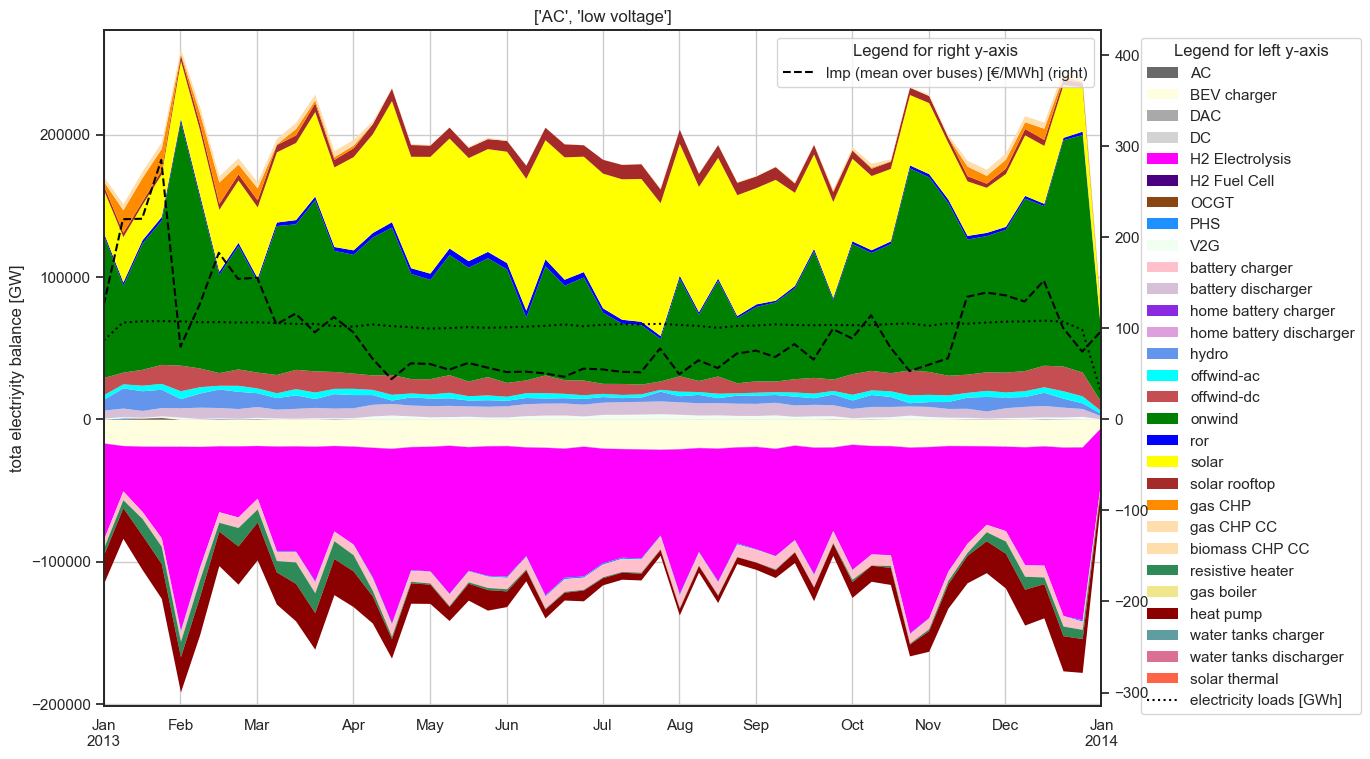

In [244]:
fig, ax = plt.subplots(figsize=(14, 8))

n = n_no
# "8h", "D", "W", "M"
res = "W"
df = nb_el_no_all.resample(res).sum()
df_loads = loads_el_no.resample(res).sum()

# split into df with positive and negative values and get colors
df_neg, df_pos = df.clip(upper=0), df.clip(lower=0)
c_neg, c_pos = [carrier_colors[col] for col in df_neg.columns], [carrier_colors[col] for col in df_pos.columns]

# plot positive values
ax = df_pos.plot.area(ax=ax, stacked=True, color=c_pos, linewidth=0.)

# rename negative values so that they are not shown and plot negative values
ax = df_neg.rename(columns=lambda x: '_' + x).plot.area(ax=ax, stacked=True, color=c_neg, linewidth=0.)

# plot lmps
lmps = n.buses_t.marginal_price[n.buses[n.buses.carrier.isin(carrier)].index].mean(axis=1)[period].resample(res).mean()
ax2 = lmps.plot(style="--", color="black", label="lmp (mean over buses) [€/MWh]", secondary_y=True)
ax2.grid(False)

# plot loads
df_loads.plot(style=":", color="black", label="electricity loads [GWh]")

# set limits of secondary y-axis
ax2.set_ylim([ - 1.5 * lmps.max() * abs(df_neg.sum(axis=1).min()) /  df_pos.sum(axis=1).max() , 1.5 * lmps.max()])

# rescale the y-axis
ax.set_ylim([1.05*df_neg.sum(axis=1).min(), 1.05*df_pos.sum(axis=1).max()])
ax.legend(ncol=1, loc="upper center", bbox_to_anchor=(1.15, 1), title="Legend for left y-axis")
ax2.legend(title="Legend for right y-axis",  loc="upper right")
ax.set_ylabel("tota electriyity balance [GW]")
ax.set_xlabel("")
ax.grid(True)
ax.set_title(f"{carrier}")
fig.tight_layout()

In [137]:
# get list of months
month_list = pd.period_range(start='2013-01-01', end='2013-12-31', freq='M')
month_list = [month.strftime("%b-%Y") for month in month_list]

res_no_all_pos = pd.DataFrame(index=month_list, columns= nb_el_no_all.columns)
res_no_all_neg = pd.DataFrame(index=month_list, columns= nb_el_no_all.columns)
res_h2_all_pos = pd.DataFrame(index=month_list, columns= nb_el_h2_all.columns)
res_h2_all_neg = pd.DataFrame(index=month_list, columns= nb_el_h2_all.columns)

iterables = [month_list, ["no H2 network", "H2 network"]]
multiindex = pd.MultiIndex.from_product(iterables, names=["month", "scenario"])
index_union = nb_el_no_all.columns.union(nb_el_h2_all.columns)
res_pos = pd.DataFrame(index=multiindex, columns=index_union)
res_neg = pd.DataFrame(index=multiindex, columns=index_union)

df_no_neg, df_no_pos = nb_el_no_all.clip(upper=0), nb_el_no_all.clip(lower=0)
df_h2_neg, df_h2_pos = nb_el_h2_all.clip(upper=0), nb_el_h2_all.clip(lower=0)

for month in month_list:
    res_no_all_pos.loc[month] = df_no_pos[month].sum()
    res_no_all_neg.loc[month] = df_no_neg[month].sum()
    res_h2_all_pos.loc[month] = df_h2_pos[month].sum()
    res_h2_all_neg.loc[month] = df_h2_neg[month].sum()

    res_pos.loc[month, "no H2 network"] = df_no_pos[month].sum()
    res_pos.loc[month, "H2 network"] = df_h2_pos[month].sum()
    res_neg.loc[month, "no H2 network"] = df_no_neg[month].sum()
    res_neg.loc[month, "H2 network"] = df_h2_neg[month].sum()

<Figure size 2000x800 with 0 Axes>

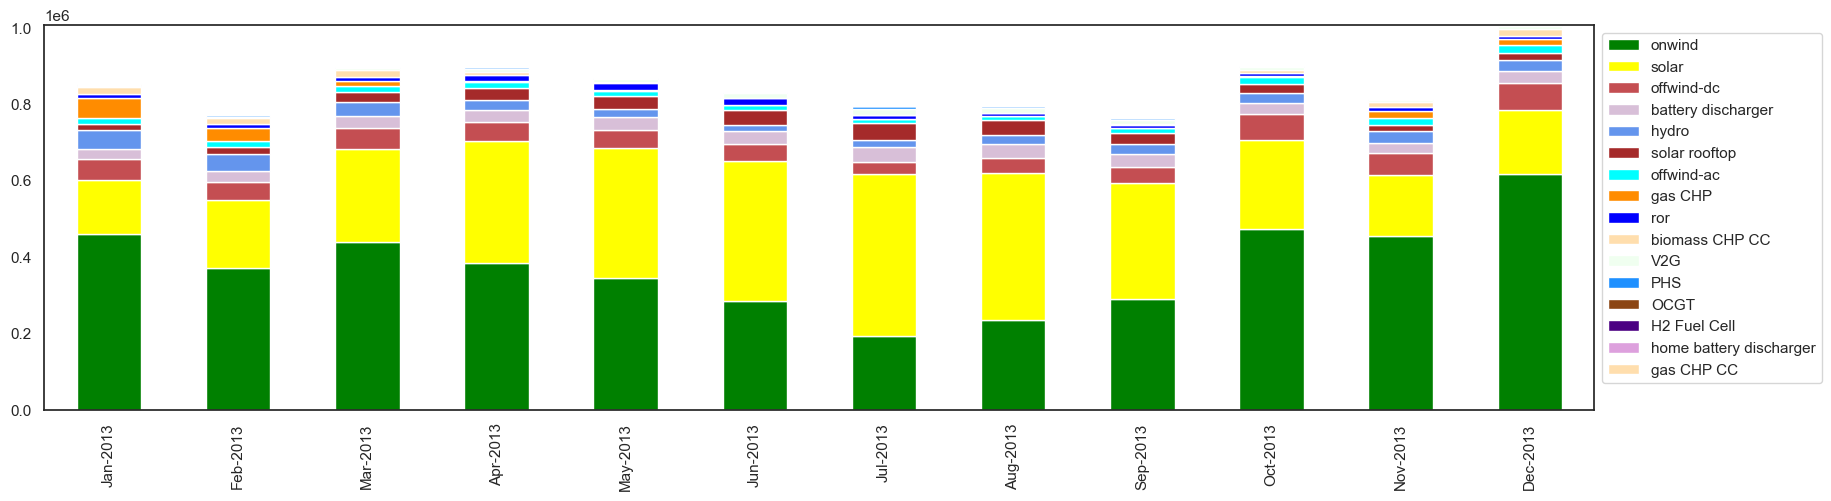

In [258]:
# sort carriers by ouptut and exclude all with less than 1 GW
index = res_no_all_pos.sum().sort_values(ascending=False)[res_no_all_pos.sum().sort_values(ascending=False) > 1].index

fig = plt.figure(figsize=(20, 8))
res_no_all_pos[index].plot(kind="bar", stacked=True, grid=False, color=[carrier_colors[c] for c in res_no_all_pos[index].columns])
plt.legend(ncol=1, bbox_to_anchor=(1, 1))
plt.show()

<Figure size 2000x800 with 0 Axes>

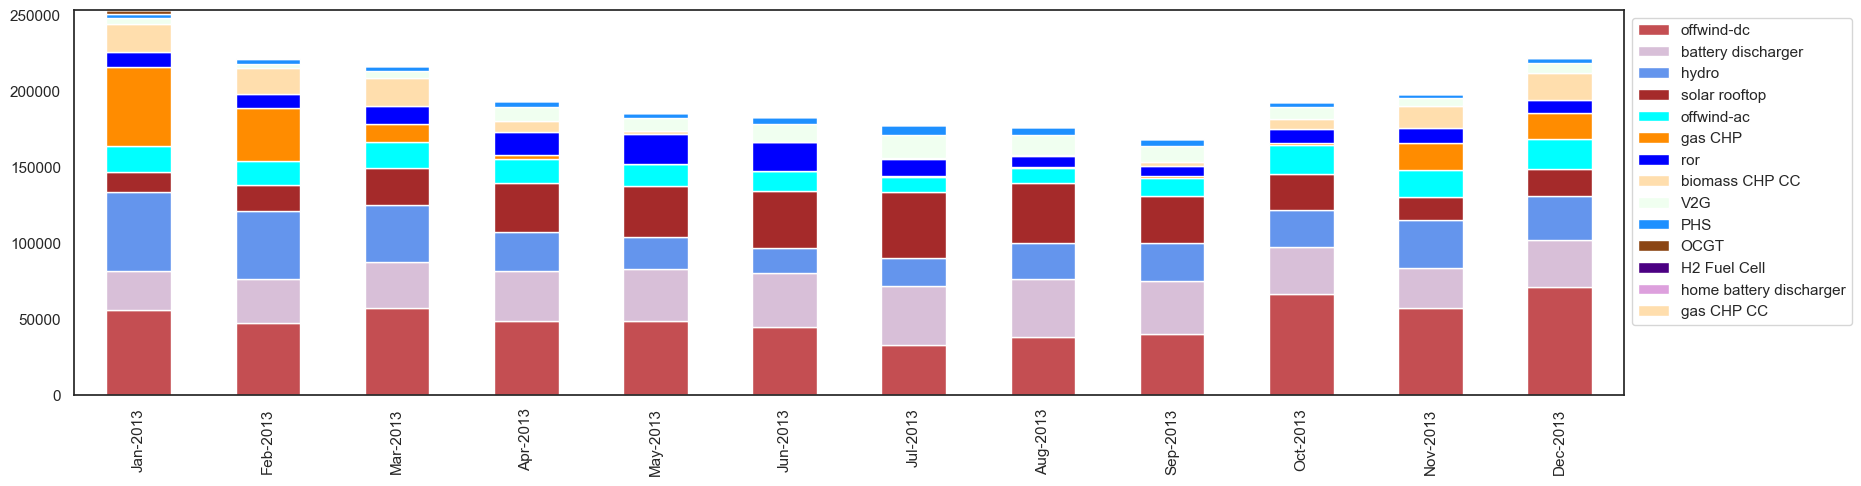

In [259]:
# exclude solar and onwind
index = index.drop(["onwind", "solar"])

fig = plt.figure(figsize=(20, 8))
res_no_all_pos[index].plot(kind="bar", stacked=True, grid=False, color=[carrier_colors[c] for c in res_pos[index].columns])
plt.legend(ncol=1, bbox_to_anchor=(1, 1))
plt.show()

<Figure size 2000x800 with 0 Axes>

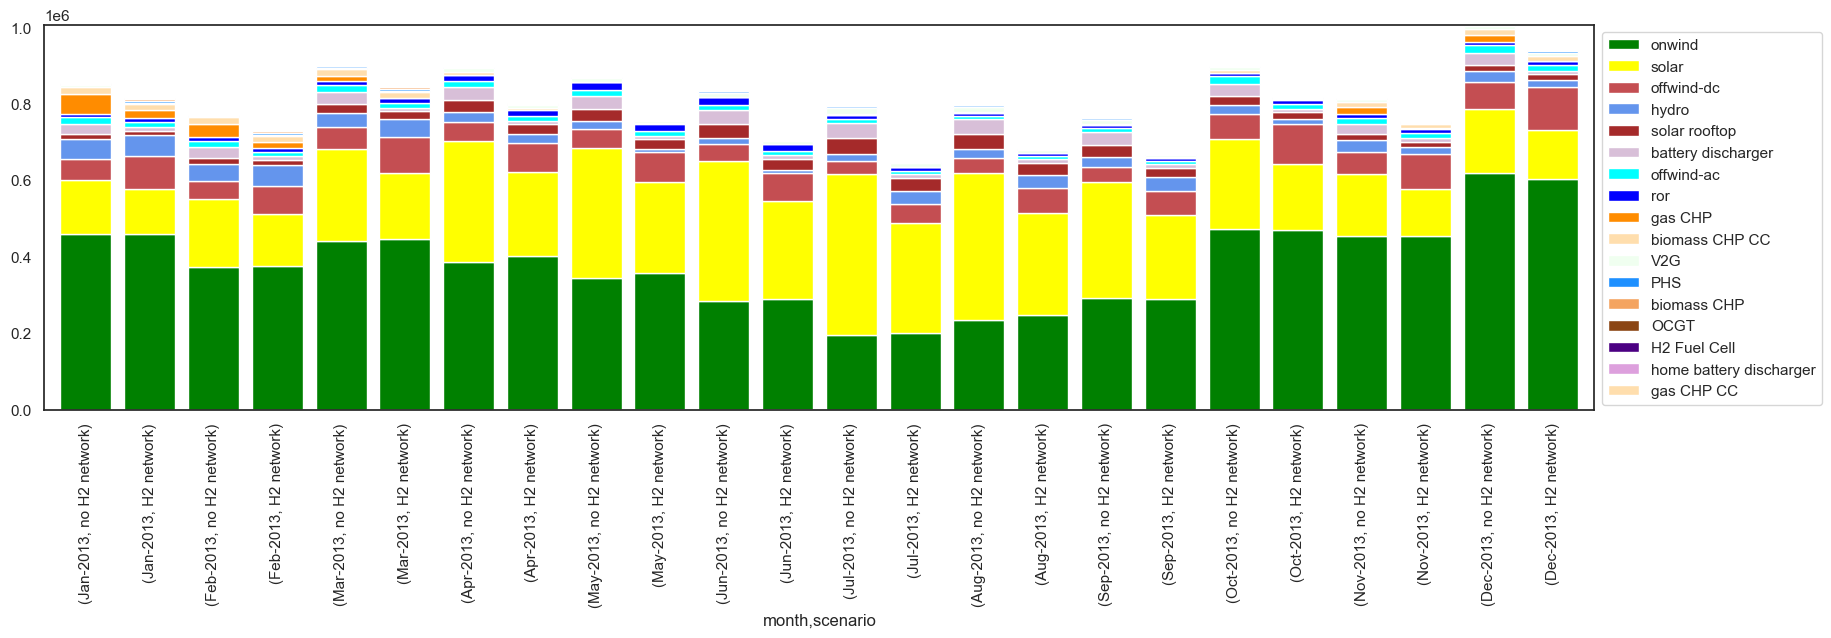

In [261]:
# sort carriers by ouptut and exclude all with less than 1 GW
index = res_pos.sum().sort_values(ascending=False)[res_pos.sum().sort_values(ascending=False) > 1].index

fig = plt.figure(figsize=(20, 8))
res_pos[index].plot(kind="bar", stacked=True, grid=False, color=[carrier_colors[c] for c in res_pos[index].columns], width=0.8)
plt.legend(ncol=1, bbox_to_anchor=(1, 1))
plt.show()

<Figure size 2000x800 with 0 Axes>

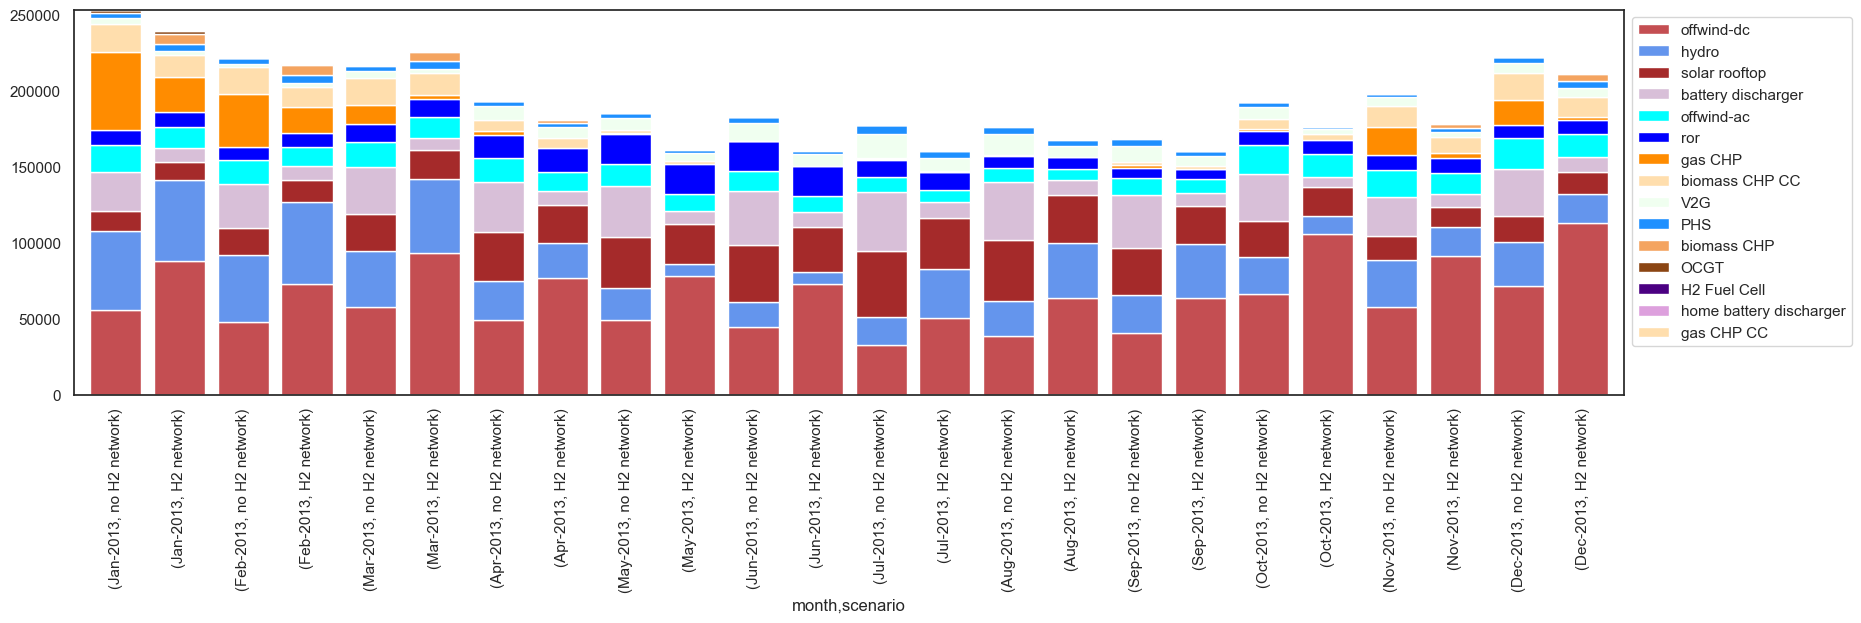

In [262]:
# exclude solar and onwind
index = index.drop(["onwind", "solar"])

fig = plt.figure(figsize=(20, 8))
res_pos[index].plot(kind="bar", stacked=True, grid=False, color=[carrier_colors[c] for c in res_pos[index].columns], width=0.8)
plt.legend(ncol=1, bbox_to_anchor=(1, 1))
plt.show()

In [269]:
abs(res_no_all_neg.sum()).sort_values(ascending=False)[abs(res_no_all_neg.sum()).sort_values(ascending=False) > 1].index

Index(['H2 Electrolysis', 'BEV charger', 'heat pump', 'battery charger',
       'resistive heater', 'PHS', 'DAC', 'home battery charger'],
      dtype='object', name='carrier')

<Figure size 2000x800 with 0 Axes>

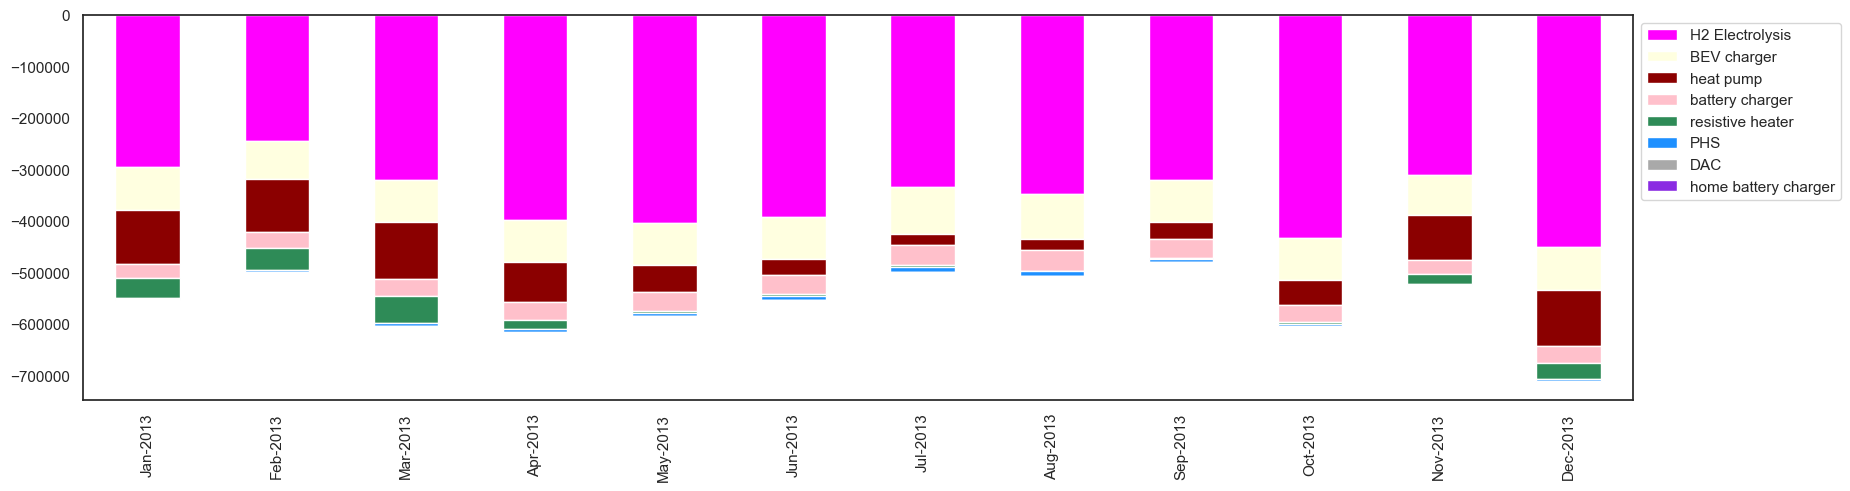

In [270]:
# sort carriers by consumption and exclude all with less than 1 GW
index = abs(res_no_all_neg.sum()).sort_values(ascending=False)[abs(res_no_all_neg.sum()).sort_values(ascending=False) > 1].index

fig = plt.figure(figsize=(20, 8))
res_no_all_neg[index].plot(kind="bar", stacked=True, grid=False, color=[carrier_colors[c] for c in res_no_all_neg[index].columns])
plt.legend(ncol=1, bbox_to_anchor=(1, 1))
plt.show()

<Figure size 2000x800 with 0 Axes>

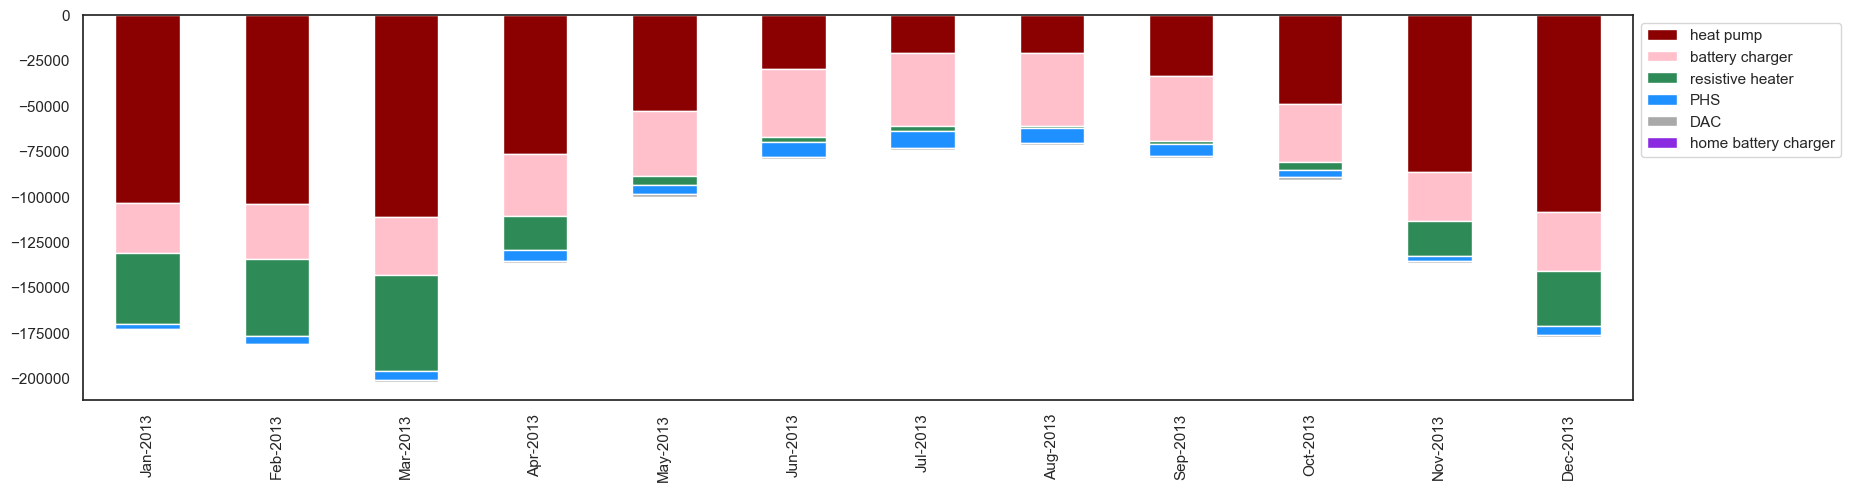

In [271]:
# exclude
index = index.drop(["H2 Electrolysis", "BEV charger"])

fig = plt.figure(figsize=(20, 8))
res_no_all_neg[index].plot(kind="bar", stacked=True, grid=False, color=[carrier_colors[c] for c in res_no_all_neg[index].columns])
plt.legend(ncol=1, bbox_to_anchor=(1, 1))
plt.show()

<Figure size 2000x800 with 0 Axes>

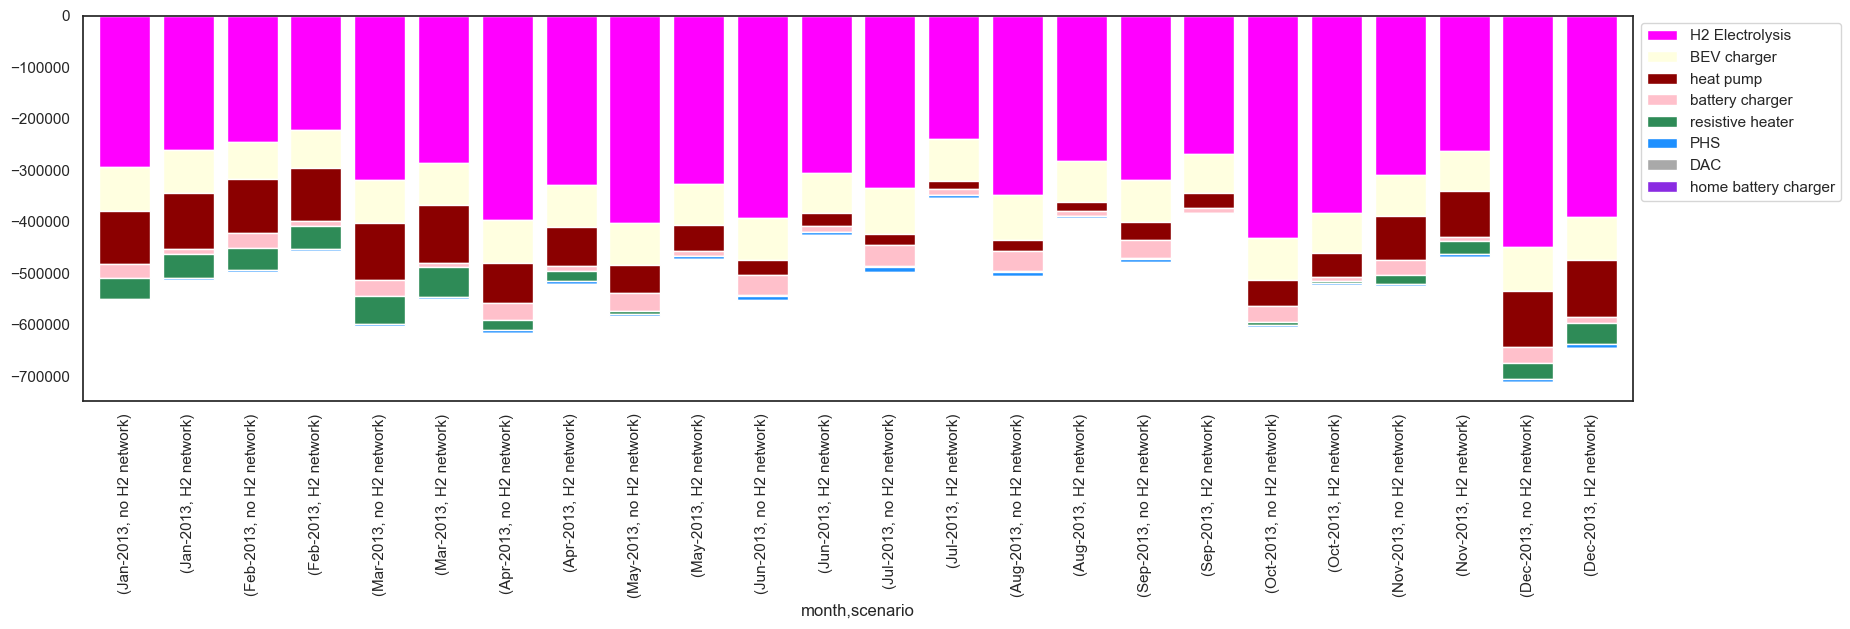

In [272]:
# sort carriers by ouptut and exclude all with less than 1 GW
index = abs(res_neg.sum()).sort_values(ascending=False)[abs(res_neg.sum()).sort_values(ascending=False) > 1].index

fig = plt.figure(figsize=(20, 8))
res_neg[index].plot(kind="bar", stacked=True, grid=False, color=[carrier_colors[c] for c in res_neg[index].columns], width=0.8)
plt.legend(ncol=1, bbox_to_anchor=(1, 1))
plt.show()

<Figure size 2000x800 with 0 Axes>

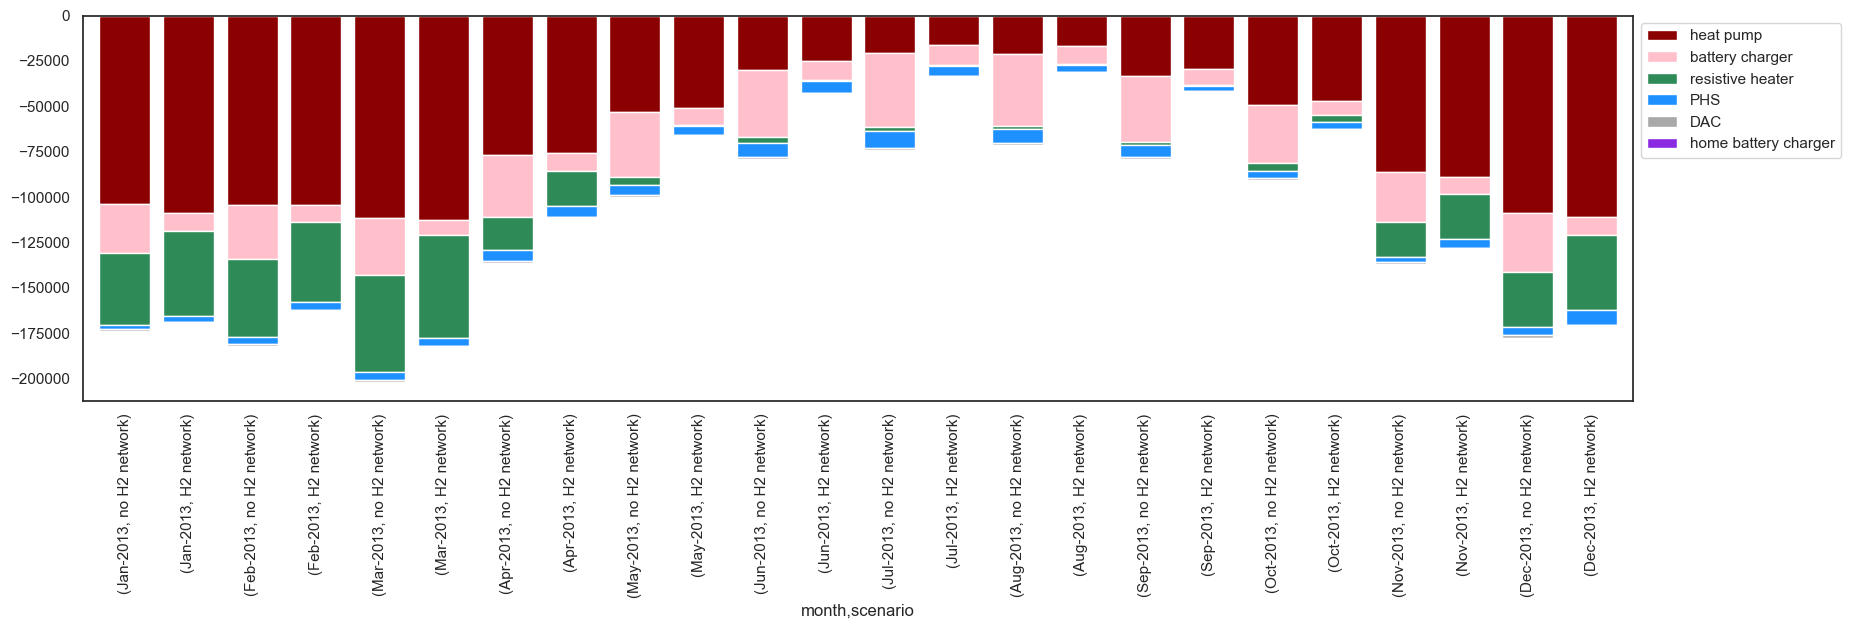

In [273]:
# exclude
index = index.drop(["H2 Electrolysis", "BEV charger"])

fig = plt.figure(figsize=(20, 8))
res_neg[index].plot(kind="bar", stacked=True, grid=False, color=[carrier_colors[c] for c in res_neg[index].columns], width=0.8)
plt.legend(ncol=1, bbox_to_anchor=(1, 1))
plt.show()

## Capacity factors, load duration curves